# Project 04 - Identify Fraud from Enron Email

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Project: Identify Fraud from Enron Email    
Course: Data Science - Foundations II  
COD: ND111  
Date: 11/02/2019    
Version: 1.0

***

# Synopsis

I have tested 6 classifiers and only one has reached the threshold of 0.30 for recall and precision. Using the classifier AdaBoost with two engineered features I have found the following metrics:

* Precision: 0.50032;
* Recall: 0.38900, and;
* Accuracy: 0.85721,

For the Features Selection, I have opted to use a non-standard way to select, creating a Genetic Algorithm to perform the selection based on the metrics (Accuracy, Precision, and Recall).

***

## Table of Contents
- [1. Introduction](#intro)
- [2. Data Wrangling](#wrangling)
    - [2.1. Data Gathering](#gathering)
    - [2.2. Data Assessing](#assessing)
    - [2.3. Data Cleaning](#cleaning)
        - [**Task 2** - Removing Outliers](#task2)    
    - [2.4. Exporing to JSON](#exporting)
- [3. Exploratory Data Analysis](#eda)
    - [3.1. Tableau Public](#story)
    - [3.2. Feature Engineering](#feature_engineering)
        - [**Task 3** - Creating new features](#task3)    
    - [3.3. Feature Scaling](#scaling)
    - [3.4. Feature Selection](#selection)
        - [**Task 4** - Try a varity of classifiers](#task4)    
        - [3.4.1. Classifier Evaluation - Default Parameters](#classifier_evaluation)
        - [3.4.2. Genetic Algorithm](#ag)
        - [3.4.3. NSGA-2](#ag_wrapper)
        - [3.4.4. GA Simulation](#ag_simulations)
        - [3.4.5. GA Solutions](#ag_solutions)
        - [**Task 1** - Feature List](#task1)
        - [3.4.6. Sensible Analysis](#sensible_analysis)
    - [3.5. Dimension Reduce](#pca)        
- [4. Predicting](#predicting)
    - [4.1. Tuning Parameters](#tuning)
    - [4.2. Classifier Evaluation - Optimized Parameters](#evaluating_classifiers)
        - [**Task 5** - Tune your classifier](#task5)
        - [**Task 6** - Dump your classifier, dataset, and features_list](#task6)
- [5. Conclusions](#conclusions)
- [6. Questions](#questions)
- [References](#references)
- [Appendix](#appendix)
    - [Given code](#code)



***

# 1. Introduction <a id='intro'></a>

I have decided to use the Jupyter Notebook due to several reasons:

* Record the data manipulation;
* Data Wrangling;
* Data Visualization, and;
* Perform a Reproducible Research.

The original file (`poi_id.py`) was used in several pieces spread all over this document.

### 1.1. Reproducibility

I have written this report using the Jupyter Notebook, which would allow anyone to reproduce this document in a local computer. I have made a great effort to document every step to turn this document understandable.

#### Work envinronment

I have performed this project using:

* Dell Notebook Inspiron 7348;
* Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz 2.40GHz;
* 8.00 GB, and;
* Windows 10 Pro 64-bits.

#### Softwares

This report has written using four software:

* Python (version 2.7.15);
* Jupyter Notebook (version 5.6.0);
* Tableau Desktop Public (version 2018.3.2 - 20183.18.1219.1533 - 64-bits);
* Opera (version 58.0.3135.47), and;
* Atom (version 1.34.1 ia32).

I have used the Atom to push it to a Github repository and minor changes.

#### Packages

I kindly ask you to install each of this packages before you run the next steps.

* pandas (version 0.23.4);
* numpy (version 1.16.0);

This list of packages and version was generate by the [version_information][version_information_github] package.

[version_information_github]: https://github.com/jrjohansson/version_information

#### Repository

I kindly ask you to install each of these packages before you run the next steps.

* https://github.com/AndersonUyekita/ND111_data_science_foundations_02

#### Path

I have written/coded this report inside of the `ud120-projects/final_project` folder.

### 1.2. Importing Libraries

For this project I will use some libraries to manage data frames, download file, Twitter API Client code, etc.. Let's import these packages to the Jupyter Notebook environment.

In [1]:
import pandas as pd

import numpy as np

import sklearn

import sys

import pickle

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

from sklearn.naive_bayes import GaussianNB

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

import json

from time import time

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Importing the K Nearest Neighbors from Scikit learn package.
from sklearn.neighbors import KNeighborsClassifier

# Importing the AdaBoost from Scikit learn package.
from sklearn.ensemble import AdaBoostClassifier

# Importing the Random Forest from Scikit learn package.
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import MinMaxScaler

import tester

C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1.3. Questions

Founded on the instructions, I will guide my Jupyter Notebook following the questions posed in the document hosted [here][q_link].

### 1.4. Rubric

Also following the instructions, I will keep in mind to attend all the requirement pointed out in the [rubric][rubric].  

[q_link]: https://docs.google.com/document/d/1NDgi1PrNJP7WTbfSUuRUnz8yzs5nGVTSzpO7oeNTEWA/pub?embedded=true
[rubric]: https://review.udacity.com/#!/rubrics/27/view

***

## 2. Data Wrangling  <a id='wrangling'></a>

I have divided the Data Wrangling process into three smaller steps:

* Data Gathering;
* Data Assessing, and;
* Data Cleaning.

### 2.1. Data Gathering <a id='gathering'></a>

All data from this project, I have forked from the Udacity Github repository. Most parts of the gathering process were already made by the instructor. For this reason, the only task I did was loading the pickle file.

In [2]:
# Task 1: Select what features you'll use.  
# features_list is a list of strings, each of which is a feature name.  
# The first feature must be "poi". 
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# Data type.
type(data_dict)

dict

The `data_dict` is a dictionary which has all information about the POI and non-POI employee from Enron.

Fortunately, a dictionary is easily converted to Data Frame.

### 2.2. Data Assessing <a id='assessing'></a>

The first step here is to realize what kind of information this dictionary has. So let's extract the keys of this dictionary and later on print the content of each key.

In [3]:
# Initialization of list.
names_key = []

# Loop to gather the keys of this dictionary.
for index in data_dict:
    names_key.append(index)

# Print the first 5 names_key from data_dict.
names_key[:5]

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P']

The keys are names.

>How many names are in this dictionary?

In [4]:
print "Number of names: ", len(names_key)

Number of names:  146


Now, I want to investigate the value associated with the first key ('METTS MARK').

In [5]:
# Value associated to the names_key.
data_dict['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

As you can see, there are several variables available to a further study. I will create a dataframe with all the information.

In [6]:
# Converting dictionary in dataframe.
df_dict = pd.DataFrame(data_dict).transpose()

# Printing the first 5 rows.
df_dict.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


>How many variables are available?

In [7]:
# Are there how many variables?
print "Variables: ", df_dict.shape[1]

Variables:  21


>How many observations are available?

In [8]:
# Are there how many observations?
print "Observations: ", df_dict.shape[0]

Observations:  146


>How many POI?

In [186]:
# POI?
print "POI:", sum(df_dict.poi)
print "non-POI:", df_dict.shape[0] - sum(df_dict.poi)

POI: 18
non-POI: 128


>What are the variables?

In [9]:
# All variables available to choose.
original_feat = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options',
                 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
                 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary',
                 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

# Priting all variables.
df_dict.columns.tolist()

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

These features could be divided into:


**Other (1):**
* POI.

**Email Features (6):**
* email_address;
* from_messages;
* to_messages;
* from_poi_to_this_person;
* from_this_person_to_poi, and;
* shared_receipt_with_poi.

**Financial Features (14):**
* bonus;
* deferral_payments;
* deferred_income;
* director_fees;
* exercised_stock_options;
* expenses;
* loan_advances;
* long_term_incentive;
* other;
* restricted_stock;
* restricted_stock_deferred;
* salary;
* total_payments, and;
* total_stock_value.

Clearly, this dataframe has a lot of `NaN`. Let's check it.

In [10]:
# Initializing a dictionary to store the NaN proportion.
nan_proportion = dict()

# Loop to create the proportion of NaN per variable.
for index in df_dict.columns.tolist():
    nan_proportion[index] = round(100 * sum(df_dict[index] == 'NaN')/float(len(df_dict[index])), 2)
    
# Converting in pandas DataFrame.
nan_proportion = pd.DataFrame.from_dict(nan_proportion, orient='index', columns = ['NaN [%]'])

# Sorting to show the variables with less NaN in the first rows.
nan_proportion.sort_values('NaN [%]')

,NaN [%]
poi,0.00
total_stock_value,13.70
total_payments,14.38
email_address,23.97
restricted_stock,24.66
exercised_stock_options,30.14
salary,34.93
expenses,34.93
other,36.30
from_poi_to_this_person,41.10


There are some variable with a high rate of `NaN`, but this is totally acceptable because neither all employee has `director_fees`, `long_term_incentive`, etc. All definition of these variables could be found in the `enron61702insiderpay.pdf`, this document is available in the repository project (`ud120-projects/final_project`).

The definition of two main variables:

* `total_payments`, and;
* `total_stock_value`.

The `total_payments` is a summation of:

* salary;
* bonus;
* long_term_incentive;
* deferred_income;
* deferral_payments;
* loan_advances;
* others;
* expenses, and;
* director_fees.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_01.png" alt="Figure 1 - Total Payments Composition" width="80%;" />
<em>Figure 1 - Total Payment composition.
</em>
</center>


The `total_stock_value` is a summation of:

* exercised_stock_options;
* restricted_stock, and;
* retricted_stock_deferred.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_02.png" alt="Figure 2 - Total Stock Value Composition" width="40%;" />
<em>Figure 2 - Total Stock Value.
</em>
</center>

As you can see, there are 7 variables without relation with `enron61702insiderpay.pdf`.

* poi;
* email_address;
* from_poi_to_this_person;
* from_messages;
* from_this_person_to_poi;
* to_messages, and;
* shared_receipt_with_poi.

Let's have a look in the features plotting a straightforward scatter plot of `total_payments` and `salary`.

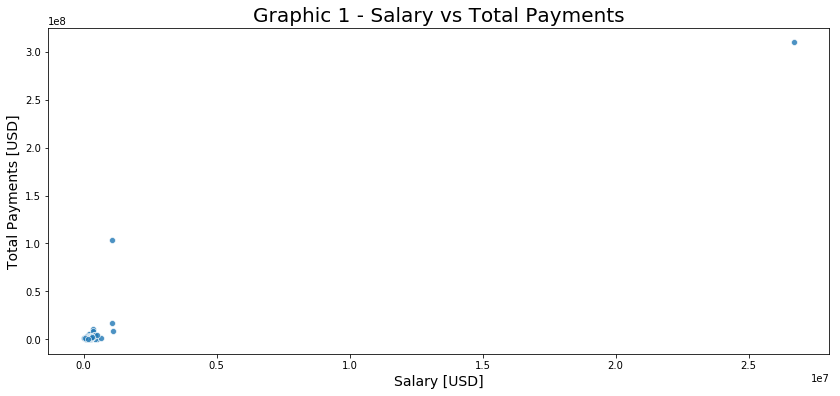

In [11]:
# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_dict.salary,           # X axis feature.
                y = df_dict.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 1 - Salary vs Total Payments', # Graphic Title.
          fontsize = 20);

Notable, there is a strange point far from the others, it is possible an outlier. Sorting the dataframe by the `salary` it is a good way to understand it.

In [12]:
# Sorting the salary, only the first 5 rows.
df_dict.query('salary != "NaN"').sort_values('salary', ascending = False)[['salary']].head()

,salary
TOTAL,26704229
SKILLING JEFFREY K,1111258
LAY KENNETH L,1072321
FREVERT MARK A,1060932
PICKERING MARK R,655037


Bear in mind, one of this observation is the `TOTAL`, which I should remove from the DataFrame because it is not an observation, it is an aggregate value.

Table 1 shows the problems to be fixed in Data Cleaning.

<br><center><strong>Table 1 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is an aggregate information|

</center>

I will check all in features from each employee to compute how many `NaN` are. If any the number of `NaN` reach 20 means that there is no information record for the given employee.

In [13]:
# List to store the values of NaN for each employee. 
employee_nan = []

for index in df_dict.transpose():
    employee_nan.append([index, sum(df_dict.transpose()[index] == 'NaN')])

In [14]:
# Converting the List in DataFrame.
employee_nan = pd.DataFrame(employee_nan, columns = ['Employee','# NaN']).sort_values('# NaN', ascending = False)

# Printing the first 10 rows.
employee_nan.head(10)

,Employee,# NaN
84,LOCKHART EUGENE E,20
138,WHALEY DAVID A,18
56,GRAMM WENDY L,18
127,THE TRAVEL AGENCY IN THE PARK,18
143,WROBEL BRUCE,18
53,GILLIS JOHN,17
142,WODRASKA JOHN,17
25,CLINE KENNETH W,17
133,WAKEHAM JOHN,17
114,SAVAGE FRANK,17


Without no doubt, the employee `LOCKHART EUGENE E` do not have any information.

In [15]:
# Printing the info from LOCKHART EUGENE E.
df_dict.loc[['LOCKHART EUGENE E']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Probably the `THE TRAVEL AGENCY IN THE PARK` is not an employee, and for this reason, I also will remove it.

There are some employees, which needs some further investigation as you can see in the query below.

In [16]:
# Employees without salary and total_stock_value.
df_dict.loc[employee_nan.Employee[:10].tolist()].query('salary == "NaN"').query('total_stock_value == "NaN"')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,119292,NaN
THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,362096,False,NaN,NaN,NaN,NaN,NaN,362096,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WAKEHAM JOHN,NaN,NaN,NaN,109298,NaN,NaN,103773,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,213071,NaN
SAVAGE FRANK,NaN,NaN,-121284,125034,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,3750,NaN


Although I have a strong reason to remove them, I can not discard it due to the lack of observations.

Table 2 shows all the issues I have found in the dataset.

<br><center><strong>Table 2 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is a aggregate information.|
|2|Quality|Validity|Programmatic|Remove the `LOCKHART EUGENE E` observation because it only has `NaN`.|
|3|Quality|Validity|Programmatic|Remove the `THE TRAVEL AGENCY IN THE PARK` observation because it is not an employee.|

</center>

### 2.3. Data Cleaning <a id='cleaning'></a>

Fortunately, there is only one problem pointed out in Data Assessing.

#### Issue ID 1

>**Issue:** Remove the observation `TOTAL`.

**Define**

* Remove from the `data_dict` the key `TOTAL`.

**Code**

In [17]:
# Copying the original dictionary.
data_dict_clean = data_dict.copy()

# Removing the TOTAL key.
data_dict_clean.pop('TOTAL');

**Test**

Visually I can assure the `TOTAL` removal plotting the `salary` by `total_payments`.

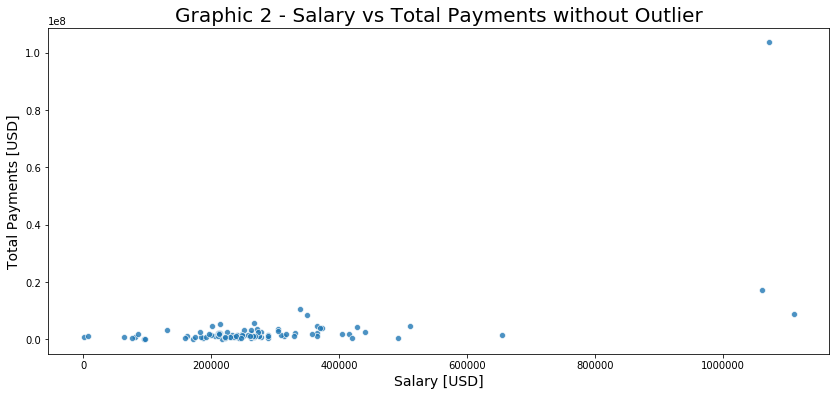

In [18]:
# Creating a dataframe to be used to plot the graphic. This is a temporaly variable.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_clean.salary,           # X axis feature.
                y = df_clean.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 2 - Salary vs Total Payments without Outlier', # Graphic Title.
          fontsize = 20);

Programmatically I can confirm the exclusion of the `TOTAL` checking the existence in the index.

In [19]:
# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'TOTAL') # 0: removed; 1: Not removed

0

#### Issue ID 2

>**Issue:** Remove the observation `LOCKHART EUGENE E`.

**Define**

* Remove from the `data_dict` the key `LOCKHART EUGENE E`.

**Code**

In [20]:
# Removing the key LOCKHART EUGENE E.
data_dict_clean.pop('LOCKHART EUGENE E');

**Test**

In [21]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'LOCKHART EUGENE E') # 0: removed; 1: Not removed

0

#### Issue ID 3

>**Issue:** Remove the observation `THE TRAVEL AGENCY IN THE PARK`.

**Define**

* Remove from the `data_dict` the key `THE TRAVEL AGENCY IN THE PARK`.

**Code**

In [22]:
# Removing the key THE TRAVEL AGENCY IN THE PARK.
data_dict_clean.pop('THE TRAVEL AGENCY IN THE PARK');

**Test**

In [23]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'THE TRAVEL AGENCY IN THE PARK') # 0: removed; 1: Not removed

0

#### Checking Dataframe

I expect to have 143 observations after the cleaning process.

In [24]:
# Number of valid observations. 
print "Number of observations: ", df_clean.shape[0]

Number of observations:  143


### Task 2 - Removing Outliers <a id='task2'></a>

>**Remove outliers**

I have removed the `TOTAL` observation because it is an aggregation. The reason to keep the extreme values from `LAY KENNETH L`, `LAVORATO JOHN J`, `SKILLING JEFFREY K`, and others are due to removing I them I will lose information and its still valid points.

I also have removed `LOCKHART EUGENE E` and `THE TRAVEL AGENCY IN THE PARK` because they were not good observations and only will insert noise. The latter has only `NaN` and the former is not an employee.

### 2.4. Exporting to JSON <a id='exporting'></a>

I have decided to export the `data_dict_clean` dictionary to a JSON file to use it in the [Tableau Public][tableau_public_url].

[tableau_public_url]: https://public.tableau.com/en-us/s/

In [25]:
# Copying
df_export = df_clean.copy()

# Converting features to float. 
df_export.deferral_payments = df_clean.deferral_payments.astype(float)
df_export.deferred_income = df_clean.deferred_income.astype(float)
df_export.director_fees = df_clean.director_fees.astype(float)
df_export.exercised_stock_options = df_clean.exercised_stock_options.astype(float)
df_export.loan_advances= df_clean.loan_advances.astype(float)
df_export.long_term_incentive= df_clean.long_term_incentive.astype(float)
df_export.restricted_stock_deferred= df_clean.restricted_stock_deferred.astype(float)

# Adding an extra columns with names.
df_export['name'] = df_export.index

# Creating a dictionary.
dict_export = df_export.to_json(orient='records')

# Writing the df_dict_clean.json in the root folder.
with open('df_dict_clean.json', mode = 'w') as file:
    file.write(dict_export)

***

## 3. Exploratory Data Analysis  <a id='eda'></a>

In consonance with the Part 6 Data Visualisation of this course, I will perform the EDA using the [Tableau Public][tableau_public_url], although this is not a requirement I will push myself to use this project as an opportunity put it in practice.

[tableau_public_url]: https://public.tableau.com/en-us/s/

The file `df_dict_clean.json` exported in [2.4. Exporting to JSON](#exporting) was used as input of Tableau Public.

### 3.1. Tableau Public <a id='story'></a>

I have created a Story to explain the EDA process.

In [26]:
%%HTML
<div class='tableauPlaceholder' id='viz1548537594428' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nd111_project_04&#47;EDA' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548537594428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.2. Feature Engineering <a id='feature_engineering'></a>

Founded on the principle of creating new features to enhance the model, I will create 5 features:

* **ratio_to_from:**

$$\text{ratio_to_from} = \frac{\text{to_messages}}{\text{from_messages}} \tag{1}$$

* **ratio_from_poi:**

$$\text{ratio_from_poi} = \frac{\text{from_poi_to_this_person}}{\text{from_messages}} \tag{2}$$

* **ratio_to_poi:**

$$\text{ratio_to_poi} = \frac{\text{from_this_person_to_poi}}{\text{to_messages}} \tag{3}$$

* **ratio_from_poi_share:**

$$\text{ratio_from_poi_share} = \frac{\text{shared_receipt_with_poi}}{\text{from_messages}} \tag{4}$$

* **ratio_salary_total_payments**

$$\text{ratio_from_poi_share} = \frac{\text{salary}}{\text{total_payments}} \tag{5}$$

Later in Feature Selection item, I will analyse each of these new features, if it is relevant to the model I will use it, if not I just need to drop out.

In [27]:
# Copying the df_clean, because I need a backup.
df_eda = df_clean.copy()

In [28]:
# Defining a function to create the feature engineering.
def feature_engineering(df, ratio_name, variable_numerator, variable_denominator):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function creates the ratio between two variables and store to a dataframe.               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to insert the new ratio.                                                        |
    |                                                                                                  |
    |    ratio_name: Ratio's name.                                                                     |
    |                                                                                                  |
    |    variable_numerator: The feature to be divided by the numerator.                               |
    |                                                                                                  |
    |    variable_denominator: The feature to divide the denominator.                                  |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the ratio stored as a new column.                                          |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly variable.
    temp = []
    
    # Loop to create the ratio.
    for num,den in zip(variable_numerator, variable_denominator):
        # For each value will analise if is a NaN or not.
        if den == 0:
            temp.append(0.)
        elif (num != 'NaN') & (den != 'NaN'):
            temp.append(num/float(den))
        else:
            temp.append(0.)

    # Adding the new column.
    df[str(ratio_name)] = temp
    
    return df

### Task 3 - Creating new features <a id='task3'></a>

>**Create new feature(s)**

Based on equations (1), (2), (3) and (4) and using the function `feature_engineering`, I will add to the dataset five new features.

In [29]:
# 1. Adding the ratio_from_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_from_poi',
                    variable_numerator = df_eda.from_poi_to_this_person,
                    variable_denominator = df_eda.from_messages);

In [30]:
# 2. Adding the ratio_to_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_to_poi',
                    variable_numerator = df_eda.from_this_person_to_poi,
                    variable_denominator = df_eda.to_messages);

In [31]:
# 3. Adding the ratio_to_from.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_to_from',
                    variable_numerator = df_eda.to_messages,
                    variable_denominator = df_eda.from_messages);

In [32]:
# 4. Adding the ratio_from_poi_share.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_from_poi_share',
                    variable_numerator = df_eda.shared_receipt_with_poi,
                    variable_denominator = df_eda.from_messages);

In [33]:
# 5. Adding the ratio_salary_total_payments.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_salary_total_payments',
                    variable_numerator = df_eda.salary,
                    variable_denominator = df_eda.total_payments);

I have created 5 news features.

* ratio_from_poi;
* ratio_to_poi;
* ratio_to_from;
* ratio_from_poi_share, and;
* ratio_salary_total_payments

In [34]:
# Storing the list of engineered features.
engineered_features = ['ratio_from_poi', 'ratio_to_poi', 'ratio_to_from', 'ratio_from_poi_share', 'ratio_salary_total_payments']

In [35]:
# Printing some features from df_clean. First 10 rows.
df_eda[['to_messages','from_messages','shared_receipt_with_poi','ratio_from_poi','ratio_to_poi','ratio_to_from','ratio_from_poi_share']].head(10)

,to_messages,from_messages,shared_receipt_with_poi,ratio_from_poi,ratio_to_poi,ratio_to_from,ratio_from_poi_share
ALLEN PHILLIP K,2902,2195,1407,0.021412,0.022398,1.322096,0.641002
BADUM JAMES P,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BANNANTINE JAMES M,566,29,465,1.344828,0.000000,19.517241,16.034483
BAXTER JOHN C,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BAY FRANKLIN R,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BAZELIDES PHILIP J,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BECK SALLY W,7315,4343,2639,0.033157,0.052768,1.684320,0.607644
BELDEN TIMOTHY N,7991,484,5521,0.471074,0.013515,16.510331,11.407025
BELFER ROBERT,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BERBERIAN DAVID,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


I have noticed the necessity to convert the `NaN` values to zero. The function `str_nan_to_0` will deal with the string one.

In [36]:
def str_nan_to_0(df, variable):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function converts the string NaN to zero.                                                |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to perform the conversion.                                                      |
    |                                                                                                  |
    |    variable: The columns name to be converted.                                                   |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the converted columns.                                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly list
    temp = []

    # When the NaN is a string.
    # Loop to fix the NaN values.
    for index in df[variable]:
        if index == 'NaN':
            temp.append(0)
        else:
            temp.append(float(index))
            
    # Updatind the columns with NaN with list with 0.
    df[variable] = temp
    
    return df

Let's convert all the `NaN` to zero.

In [37]:
# Loop to convert all columns from df_eda.
for index in df_eda:
    # These two features do not need this conversion.
    if index in ['email_address']:
        continue
    else:
        # Convert String NaN to 0.
        str_nan_to_0(df = df_eda, variable = index);
        
        # Convert float NaN to 0.
        df_eda[index] = df_eda[index].fillna(0)

In [38]:
# Saving the dataset in dictionary type.
dict_eda = df_eda.to_dict(orient = 'index')

### 3.3. `featureFormat` and `targetFeatureSplit`

These two functions are given from the project template. I have coded a function to bundle them.

In [39]:
# Following the instructions.
my_dataset = dict_eda

# This is
def wrapper_featureformatsplit(my_dataset, features_list):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function runs two scripts: featureFormat and targetFeatureSplit.                         |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    my_dataset: This is a dictionary.                                                             |
    |                                                                                                  |
    |    features_list: List of variable to be gathered from my_dataset.                               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    labels: This is the POI feature from my_dataset.                                              |
    |                                                                                                  |
    |    features: This is an array with the features_list values.                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Creating data ACCORDING to the features_list, which is input of targetFeatureSplit.
    data = featureFormat(my_dataset, features_list, sort_keys = True)

    # Using data to create labels and features.
    labels, features = targetFeatureSplit(data)
    
    # Returning the labels and features.
    return labels, features

In [40]:
# Using the defined wrapper_feat_form_split function.
labels, features = wrapper_featureformatsplit(my_dataset, original_feat)

The `labels` are the values `POI` and `non-POI`. This is what I want to predict.

In [41]:
# Printing the first labels.
labels[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

The feature is a numpy array where most of the variables from `dict_eda` are stored in a list.

$$features = [observation_1, \dots, observation_n]$$

Where:

$$observation_1 = [variable_1, variable_2, \dots, variable_{m}] $$

In [42]:
# Printing the first row of features.
features[0]

array([ 4.175000e+06,  2.869717e+06, -3.081055e+06,  0.000000e+00,
        1.729541e+06,  1.386800e+04,  2.195000e+03,  4.700000e+01,
        6.500000e+01,  0.000000e+00,  3.048050e+05,  1.520000e+02,
        1.260270e+05, -1.260270e+05,  2.019550e+05,  1.407000e+03,
        2.902000e+03,  4.484442e+06,  1.729541e+06])

### 3.3. Feature Scaling <a id='scaling'></a>

Due to the financial values varying from zero to a million dollar, these values could be dominant over the number of emails. For this reason, it is necessary to scale all the features. I will use the `MinMaxScaler` because this is the one used during the class.

In [43]:
# Function to scale.
def feat_scale(feat):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    Scale the matrix using the MinMaxScaler module from Scikit Learn.                             |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    feat: Matrix/DataFrame to be scaled.                                                          |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    feat: Scaled dataframe.                                                                       |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Importing library.
    from sklearn.preprocessing import MinMaxScaler

    # Creating the classifier to scale.
    #scaler = MinMaxScaler()
    scaler = MinMaxScaler(feature_range=(-1, 1))

    
    # Fitting the classifier.
    scaler.fit(feat)

    # Transform the data. It means: Scale the data.
    feat = scaler.transform(feat)

    # Printing the scaled data.
    return feat

In [44]:
# Scaling the features dataframe.
features = feat_scale(features)

# Printing the first row of features.
features[0]

array([ 0.04375   , -0.0896021 , -0.75839933, -1.        , -0.89929419,
       -0.87875662, -0.69445991, -0.8219697 , -0.7865353 , -1.        ,
       -0.88152409, -0.99997066, -0.68553633, -0.80730865, -0.63652905,
       -0.49030973, -0.6168724 , -0.91339415, -0.92783384])

### 3.4. Feature Selection <a id='selection'></a>

Due to the several features available, and to decrease the number of it, I have decided to use the `SelectKBest` from Scikit Learn package to perform the Feature Selection.

The reasons to opt to feature selection:

* Reduce the overfitting, and;
* Reduce the computational processing time due to a simpler model, it also provides an easier model to interpret.

_Read more about it in this reference:_ [Feature Selection][lasso]

[lasso]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf

The function below will calculate the "K Best Features".

In [45]:
# General purpose function.
def feat_selection(k , feat, lab, feat_list, f_classif = 'f_classif'):
    """
    Performs the SelectionKBest from a given feat and lab.
    
    Uses the f_classif to rank/score the features.
    """
    # Importing the modules SelectKBest and f_classif
    from sklearn.feature_selection import SelectKBest, f_classif

    # Creating the classifier.
    selector = SelectKBest(f_classif, k = k)

    # Fitting the data.
    selector.fit(feat, lab)

    # Printing the scores.
    selector.scores_ 
    
    # Create a DataFrame to ease the Comparison.
    comparison = pd.DataFrame(zip(feat_list[1:],selector.scores_,selector.pvalues_), columns = ['feature','scores','p_values'])
    
    # Sorting the DataFrame by scores.
    comparison.sort_values('scores', ascending = False, inplace = True)
    
    # Multiple values to return.
    return comparison

I have used, for this example, all features available from `data_dict`.

The `wrapper_featureformatsplit` function has created labels and features.

In [46]:
# Creating the label vector and features dataframe.
lab_example, feat_example = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = original_feat)

# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results = feat_selection(k = 5, feat = feat_example, lab = lab_example, feat_list = original_feat)

# Printing.
feat_sel_results.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


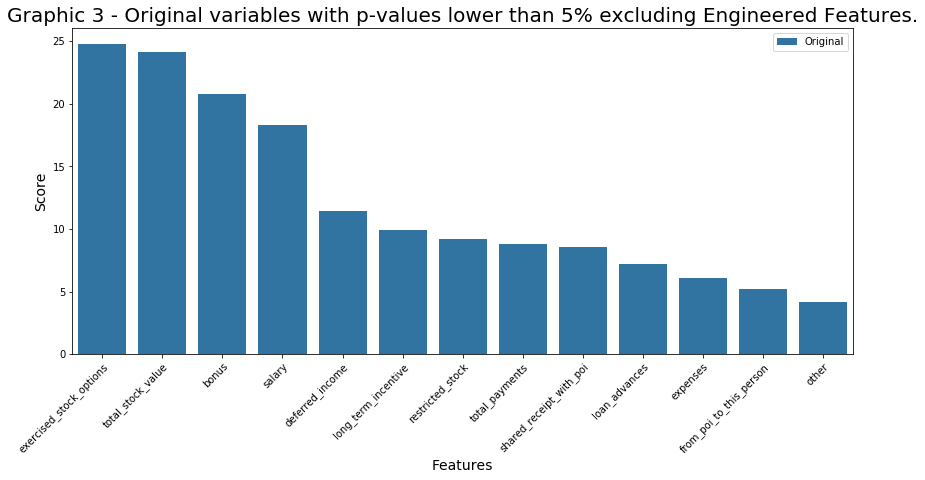

In [47]:
# Adding the hue to be comparable to the next graphic.
feat_sel_results['hue'] = 'Original'

# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results.query('p_values < 0.05').feature,
                 y = feat_sel_results.query('p_values < 0.05').scores,
                 hue = feat_sel_results.hue);
plt.title('Graphic 3 - Original variables with p-values lower than 5% excluding Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

Assuming the $\alpha$ equal to 0.05, there are 13 features with p-values lower than $\alpha$, which means when adding these features its somehow changes the output (there is statistical significance).

In the example above I have not aggregated the features engineered.

Let's use the `SelectedKBest` but now using all features and the engineered features.

In [48]:
# Adding to the original_feat list the engineered features.
complete_feat = original_feat + engineered_features

# Printing.
complete_feat

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio_from_poi',
 'ratio_to_poi',
 'ratio_to_from',
 'ratio_from_poi_share',
 'ratio_salary_total_payments']

In [49]:
# Creating the label vector and features dataframe.
lab_example, feat_example = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = complete_feat)

# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results_complete = feat_selection(k = 5, feat = feat_example, lab = lab_example, feat_list = complete_feat)

# Printing.
feat_sel_results_complete.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


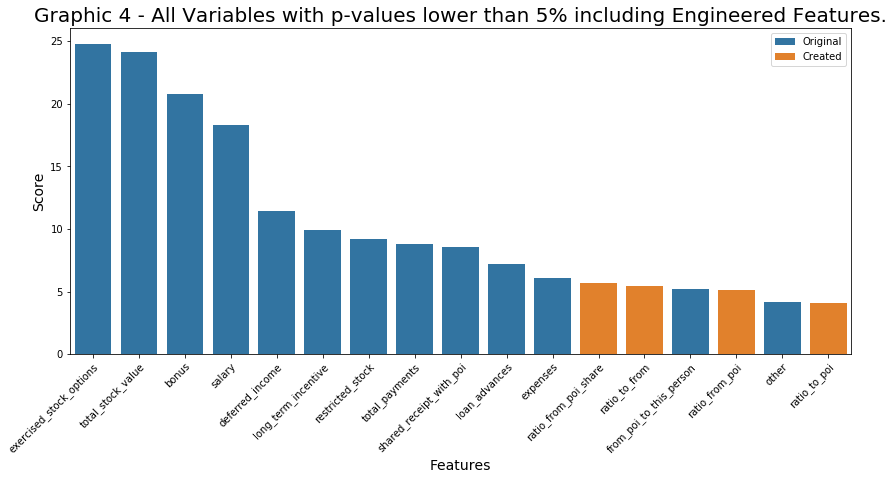

In [50]:
# Adding a new columns to use as hue in the graphic.

# Temporaly variable only to store if this is a feature engineered or not.
my_hue = []

# Loop to check it.
for feat_name in feat_sel_results_complete.feature:
    if feat_name in engineered_features:
        my_hue.append('Created')
    else:
        my_hue.append('Original')

feat_sel_results_complete['hue'] = my_hue
        
# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results_complete.query('p_values < 0.05').feature,
                 y = feat_sel_results_complete.query('p_values < 0.05').scores,
                 hue = feat_sel_results_complete.hue, dodge = False);
plt.title('Graphic 4 - All Variables with p-values lower than 5% including Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

As you can see, there are very strong variables to consider in the model, and the engineered features did not have good performances, but let's give a try using them to predict.

I have created two lists of features:

* `features_significant_original`;
    * Only original features (from `my_dataset`);
* `features_significant_complete`;
    * Original features plus engineered features.

The only way to measure the impact of each feature is by analysing them together. That is why I have adopted a distinct way to select the features adding a step, which I will describe in details in the next item (3.4.2.).

Before it, I want to see the correlation between variables because it is a good way to understand the variables behaviour.

In [51]:
# Saving the lists of features.
features_significant_original = feat_sel_results.query('p_values < 0.05').feature.tolist()
features_significant_complete = feat_sel_results_complete.query('p_values < 0.05').feature.tolist()

Let's plot the correlation map for the `features_significant_original`.

In [52]:
# Creating a function to calculate the correlation between variables.
def calc_correlation(df, feat_list):
    """
    Calculates the correlation between variables from df DataFrame which is
    in the feat_list.
    """
    # Temporaly variable. List to store the columns values.
    temp = []

    # Loop to subset the dataframe.
    for index in feat_list:
        temp.append(df[index])

    # Correlation Calculation.
    return pd.DataFrame(np.corrcoef(temp), columns = feat_list, index = feat_list)

In [53]:
# Creating a function to plot a heatmap.
def heatmap(df_corr, title):
    """
    Based on the df_corr (it is a list) creates a "heatmap" of correlations.
    """
    plt.figure(figsize = [8,6])                  # Graph/Figure size
    ax = sns.heatmap(df_corr, linewidth=0.5)     # Heatmap
    ax.set_xticklabels(df_corr.index)            # X ticks labels
    ax.set_yticklabels(df_corr.columns)          # Y ticks labels
    plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
             ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=0,   # 0 degree labels on Y axis
             ha="right", rotation_mode="anchor")
    plt.title(title,
              fontsize = 20);
    plt.show()

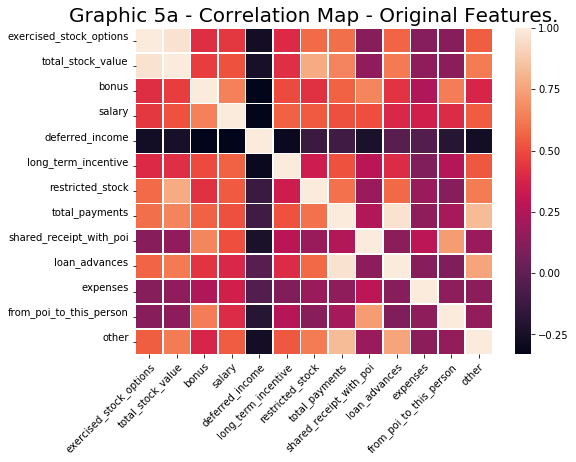

In [54]:
# Priting the heatmap.
heatmap(calc_correlation(df_eda, feat_list = features_significant_original),
        title = "Graphic 5a - Correlation Map - Original Features.")

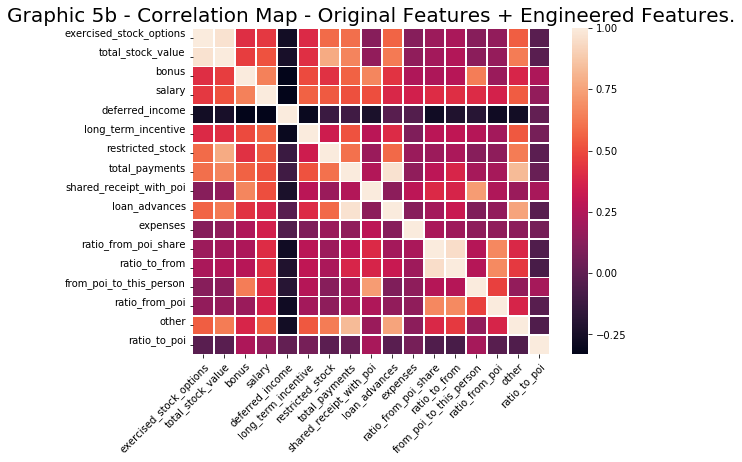

In [55]:
# Priting the heatmap.
heatmap(calc_correlation(df_eda, feat_list = features_significant_complete),
        title = "Graphic 5b - Correlation Map - Original Features + Engineered Features.")

As you can see, there are variables with high correlation such as:

* `total_stock_value` and `total_payments`;
* `shared_receipt_with_poi` and `from_poi_to_this_person`, and;
* `deferred_income`which do not have relationship with any variable.

#### 3.4.1. Evaluating the Classifiers <a id='classifier_evaluation'></a>

Let's evaluate the lists of features `features_significant_original` and `features_significant_complete` using standards configuration of several classifiers.

The reason to do it is to make a sensible analysis of features selected to the final model.

Have in mind, I have employed to this task the simplest way to divide a dataset into training and testing applying the `train_test_split` module from Scikit Learn. In future chapters, I will use more sophisticated methods to split the dataset according to the complex of the task and necessity.

In [56]:
# Adding the 'poi' in the list and adding as first element as preconized by the code.
features_significant_original = ['poi'] + features_significant_original
features_significant_complete = ['poi'] + features_significant_complete

I have created a function to bundle code lines because it could be repetitive.

In [57]:
# Function to create the dataset of features according to the features selected.
def create_traintest(my_data_dict, feat_list):
    """
    This function apply the function wrapper_featureformatsplit to create the
    labels vector and features matrix, then scale it and finally create the training
    and testing dataframes.
    """
    from sklearn.model_selection import train_test_split
    
    # Create the Labels vector and Features Matrix.
    lab, feat = wrapper_featureformatsplit(my_dataset = my_data_dict, features_list = feat_list)
    
    # Scaling the Feature Matrix due to the extreme values.
    feat = feat_scale(feat)
    
    # Spliting the data into training and testing.
    features_train, features_test, labels_train, labels_test = train_test_split(feat, lab, test_size=0.3, random_state=42)
    
    # Returning a list.
    return features_train, features_test, labels_train, labels_test

Unfortunately, I have not tuned/calibrated the classifier so I will use the regular/default values as a starter. This function is a straightforward way to evaluate each set of features.

In [58]:
def select_fit_evaluate(classifier, train_test_data):
    """
    This function calculates the accuracy, recall, and precision given the training, testing
    dataset, and classifier.
    """
    # Unzipping the list from the create_traintest funciton.
    feat_train, feat_test, lab_train, lab_test = train_test_data
    
    # List of Classifier and parameters.
    list_class = {'ada':('ada', AdaBoostClassifier(n_estimators=100)),
                  'svc':('svc', SVC(gamma='auto')),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier(n_neighbors=5)),
                  'random':('rand', RandomForestClassifier(n_estimators = 100))}
    
    # Creating the Pipeline.
    pipeline_ = Pipeline([list_class[classifier]])
    
    # Fitting.
    pipeline_.fit(feat_train,lab_train)
    
    # Predicting.
    pred_t = pipeline_.predict(np.array(feat_test))
        
    # Calculating the accuracy.
    acc = accuracy_score(lab_test, pred_t)
    
    # Calculating the recall. It is an array of (recall non-POI, recall POI)
    recall = recall_score(y_true = lab_test, y_pred = pred_t, average = None)

    # Calculating the precision. It is an array of (precision non-POI, precision POI)
    precision = precision_score(y_true = lab_test, y_pred = pred_t, average = None)
    
    # Return the accuracy.
    return acc, recall.tolist(), precision.tolist()

So far I have created 2 lists of features.

* `features_significant_original`: Selected features from all features using `SelectKBest`, and;
* `features_significant_complete`: Selected features from all features plus engineered features using `SelectKBest`.

I have used the opportunity to evaluate two other set of features:

* `original_feat`: All 20 features from the original source;
* `complete_feat`: All 20 features from the original source plus 5 Engineered Features;

In [59]:
# Not considering the 'POI'.
print "features_significant_original", len(features_significant_original)
print "features_significant_complete", len(features_significant_complete)
print "original_feat", len(original_feat)
print "complete_feat", len(complete_feat)

features_significant_original 14
features_significant_complete 18
original_feat 20
complete_feat 25


In [60]:
# All list I have created so far.
all_list = [original_feat, complete_feat, features_significant_original, features_significant_complete]

The follow function will create a table of comparison of a given list of features.

In [61]:
# Creates a table of comparison.
def comparison_metrics(classifier, list_of_list):
    """
    Creates a dataframe with the values of accuracy, recall, and precision for all
    set of features in list_of_list.
    """
    # Compute the time consuming.
    import time
    
    # Tracking the time.
    t_start = time.time()
    
    # Temporaly variables to store the values of accuracy, recall and precision.
    acc = [] # Accuracy
    recall = [] # recall from poi and non-poi
    precision = [] # precision from poi and non-poi

    # Loop to calculate for each list of features the accuracy, precision and recall.
    for index in list_of_list:
        # Unloading the values calculated by select_fit_evaluate function. 
        i_acc,\
        i_recall,\
        i_precision = select_fit_evaluate(classifier = classifier,
                                          train_test_data = create_traintest(my_dataset,
                                                                             feat_list = index))
        
        # Appending the values in the list.
        acc.append(i_acc)
        recall.append(i_recall)
        precision.append(i_precision)

    # Converting to DataFrame.
    acc = pd.DataFrame(acc, columns = ['accuracy'])
    recall = pd.DataFrame(recall, columns = ['recall_non_poi','recal_poi'])
    precision = pd.DataFrame(precision, columns = ['precision_non_poi','precision_poi'])

    # Merging.
    comparison = acc.join(recall).join(precision)

    # Renaming the rows.
    comparison.index = ['original_feat','complete_feat','features_significant_original','features_significant_complete']

    # Tracking the time
    t_end = time.time()
    
    print "Duration:", round((t_end - t_start)/60, 4), "minutes"
    
    # Printing the results.
    return comparison

Let's compare each set of features using different classifiers.

### Task 4 - Try a varity of classifiers <a id='task4'></a>

>**Try a varity of classifiers**

I have used all features from each set of features.

In [62]:
# Naïve Bayes.
comparison_metrics(classifier = 'gauss', list_of_list = all_list)

Duration: 0.0007 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.395349,0.342105,0.8,0.928571,0.137931
complete_feat,0.372093,0.342105,0.6,0.866667,0.107143
features_significant_original,0.860465,0.921053,0.4,0.921053,0.400000
features_significant_complete,0.860465,0.921053,0.4,0.921053,0.400000


In [63]:
# Random Forest.
comparison_metrics(classifier = 'random', list_of_list = all_list)

Duration: 0.0342 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.906977,1.000000,0.2,0.904762,1.0
complete_feat,0.906977,1.000000,0.2,0.904762,1.0
features_significant_original,0.906977,1.000000,0.2,0.904762,1.0
features_significant_complete,0.883721,0.973684,0.2,0.902439,0.5


In [64]:
# AdaBoost.
comparison_metrics(classifier = 'ada', list_of_list = all_list)

Duration: 0.0309 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.813953,0.894737,0.2,0.894737,0.200000
complete_feat,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_original,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_complete,0.837209,0.921053,0.2,0.897436,0.250000


In [65]:
# Decision Tree.
comparison_metrics(classifier = 'tree', list_of_list = all_list)

Duration: 0.001 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.860465,0.947368,0.2,0.900000,0.333333
complete_feat,0.837209,0.921053,0.2,0.897436,0.250000
features_significant_original,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_complete,0.860465,0.947368,0.2,0.900000,0.333333


In [66]:
# K Nearest Neighbor.
comparison_metrics(classifier = 'knn', list_of_list = all_list)

Duration: 0.0009 minutes


C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.837209,0.947368,0.0,0.878049,0.0
complete_feat,0.837209,0.947368,0.0,0.878049,0.0
features_significant_original,0.883721,1.000000,0.0,0.883721,0.0
features_significant_complete,0.860465,0.973684,0.0,0.880952,0.0


In [67]:
# Support Vector Machine.
comparison_metrics(classifier = 'svc', list_of_list = all_list)

Duration: 0.0007 minutes


C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ander\AppData\Roaming\Python\Python27\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.883721,1.0,0.0,0.883721,0.0
complete_feat,0.883721,1.0,0.0,0.883721,0.0
features_significant_original,0.883721,1.0,0.0,0.883721,0.0
features_significant_complete,0.883721,1.0,0.0,0.883721,0.0


Without any tuning/calibration the Gauss, AdaBoost, and Random Forest have performed better results.

The `original_feat` and `complete_feat` are calculated only as a reference to the `features_significant_original` and `features_significant_complete`. In many cases, the sets of features with the highest numbers of features have resulted in worse metrics (accuracy, recall, and precision).

Have in mind, from the set of features `features_significant_original` and `features_significant_complete`, I will refine the right number of features to be used for further study because both lists have all features with statistical significance. Recall, the possible combination using or not all features:

* `features_significant_original` has 14 features, which means 16,384 combinations ($2^{14}$), and;
* `features_significant_complete` has 18 features, which means 262,144 combinations ($2^{18}$).

#### 3.4.2. Algorithm to Select the Features <a id='ag'></a>

This part of the project went a bit out of control due to the effort to code a Genetic Algorithm from zero.

The following chunks were used to define all functions necessary to run a Genetic Algorithm called NSGA-2 [(A fast and elitist multiobjective genetic algorithm: NSGA-II)][k_deb].

[k_deb]: https://ieeexplore.ieee.org/document/996017

##### Objective Function

I have used the Accuracy, Precision, Recall, and the number of features as metrics to evaluate each candidate as the optimized set of features. The main reason to use this algorithm is a kind of kick off of set of features.

$$\text{maximize } \text{ \{accuracy, recall, precision\} } \tag{6}$$
$$\text{minimize } \text{ \{number of features\} }$$


Unfortunately, I have not implemented the best way to evaluate each candidate (a random set of features), because it could take a too long time to finish using a regular computer. So, I have only considered a "single run" for each candidate using the simple Naïve Bayes classifier (the faster one) and then calculate the metrics.

Bear in mind, I have used for this first step the output average of a Stratified KFolds.

##### Explanation

There is no guarantee selecting the first features ranked by the `SelectedKBest` it will produce a "very good" optimized solution. For this reason, I have opted to use the NSGA2 to search a "third-way" solution.

Founded on the principle of the [ceteris paribus][ceteris_paribus], where I only make changes in a small part of the problem and keeps everything constant, I have evaluated each candidate and selected the most promisor to the next step.

[ceteris_paribus]: https://en.wikipedia.org/wiki/Ceteris_paribus

In [68]:
# Metrics to evaluate each chromosome.
metrics = ['accuracy', 'precision_non_poi', 'precision_poi', 'recall_non_poi', 'recall_poi', 'qty_features']

In [69]:
def individual(genes):
    """
    This function creates a vector that minetizes the chromosomes, each
    gene is a feature selected (1: selected, 0: not selected).
    """
    return np.random.choice([0, 1], genes, 0.5)

In [70]:
def population(n, genes):
    """
    This functions creates a population using several times the individual() function.
    """
    # Temporaly variable to store the entire population.
    df = []

    # Loop to create the population.
    for index in range(0,n):
        df.append(individual(genes))
    
    # Return the population as numpy DataFrame.
    return pd.DataFrame(df).transpose()

In [71]:
def crossing_over(ind_1, ind_2):
    """
    Performs the crossing over between two chromosomes.
    """
    # Random draw the crossing location.
    cross = np.random.choice(range(1,len(ind_1)),1)

    # Creates two new chromosomes using the parents fragments.
    crossed_1 = ind_1[:cross[0]] + ind_2[cross[0]:]
    crossed_2 = ind_2[:cross[0]] + ind_1[cross[0]:]
    
    # Return the two chromosomes crossed. 
    return pd.DataFrame([crossed_1, crossed_2], index = ['crossed_1', 'crossed_2']).transpose()

In [72]:
def random_picker(df, n):
    """
    This function will be used to random draw individuals from the current population.
    """
    return df.sample(n, axis = 1)

In [73]:
def mutation_gene(ind):
    """
    This function perform the gene mutation.
    """
    # Random draw of a gene to be mutated. 
    gen = np.random.choice(range(0,len(ind)),1)

    # Changes 0 to 1 and 1 to 0.
    if ind[gen[0]] == 0:
        ind[gen[0]] = 1
    else:
        ind[gen[0]] = 0

    # Return the mutated chromosome.
    return ind

In [74]:
def mutation_pop(pop_to_mutate):
    """
    This function creates the mutates person from the given population.
    """
    
    temp = []

    for index in pop_to_mutate:
        temp.append(mutation_gene(pop_to_mutate.loc[:,index].tolist()))

    temp = pd.DataFrame(temp).transpose()

    temp.columns = map(lambda x : 'm' + str(x), temp.columns)

    return temp

In [75]:
parameters = {}

# Creating the Fit evaluation 
def fit_evaluation(module, feat, lab, n_splits, classifier, random_state = None, test_size = 0.25, parameters = parameters):
    """
    Calculates the metrics (accuracy, precision, and recall).
    """
    
    # Converting to array.
    X = np.array(feat)
    y = np.array(lab)
    
    # Dictionary of Classifiers and Constructors.
    list_class = {'ada':('ada', AdaBoostClassifier()),
                  'svc':('svc', SVC()),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier()),
                  'rand':('rand', RandomForestClassifier())}
    
    # Initializing empty lists.
    acc_mean = []
    recall_non_poi_mean, recall_poi_mean = [], []
    precision_non_poi_mean, precision_poi_mean = [], []
    
    # ========== STRATIFIED KFOLDS ITERABLE ============== #
    
    # Select the kind of generate training and testing dataset.
    if module == 'skfolds':
    
        # Creating the iterable.
        iterable = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state)

    # ========= STRATIFIED SHUFFLE SPLIT ITERABLE ======== #
    
    elif module == 'sss':
        # Creating the iterable.
        iterable = StratifiedShuffleSplit(n_splits = n_splits, test_size = test_size, random_state = random_state)
    
        # Divide into n_splits.
        iterable.get_n_splits(X, y)

    # ERROR!
    else:
        print "ERROR! - fit_evaluation - Non-valid module value"
        
    # Loop to create the train and test dataset.
    for train_index, test_index in iterable.split(X, y):
        
        # Subsetting to create the features and labels.    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # ========================== Stratified KFolds =====================================+
        if module == 'skfolds':
      
            # Creating the Pipeline.
            pipeline = Pipeline([list_class[classifier]])

            # Fitting.
            pipeline.fit(X_train,y_train)

            # Predicting.
            pred = pipeline.predict(np.array(X_test))
            
        # ========================== Stratified Shuffle Split ===============================
        elif module == 'sss':
            
            # Creating the Pipeline.
            pipeline = Pipeline([list_class[classifier]])

            # Creating the GridSearch Object.
            clf = GridSearchCV(estimator = pipeline,                  # Pipeline
                               param_grid = parameters,               # Parameters to be tested.
                               cv = None)                             # Third party cross validation.

            # Fitting.
            clf.fit(X_train, y_train)

            # Predicting.
            pred = clf.predict(X_test)
        
        # ERROR
        else:
            print "ERROR! - fit_evaluation - Non-valid module value"
        
        # ================= METRICS =======================#
        
        # Calculating the Recall, Precision, and Accuracy.
        recall_non_poi, recall_poi = recall_score(y_test, pred, average = None)
        precision_non_poi, precision_poi = precision_score(y_test, pred, average = None)
        acc = accuracy_score(y_test, pred)
              
        # Appending the values.
        acc_mean.append(acc)
        recall_non_poi_mean.append(recall_non_poi)
        recall_poi_mean.append(recall_poi)
        precision_non_poi_mean.append(precision_non_poi)
        precision_poi_mean.append(precision_poi)
    
    return np.mean(acc_mean), np.mean(recall_non_poi_mean), np.mean(recall_poi_mean), np.mean(precision_non_poi), np.mean(precision_poi)

In [76]:
def cost_function(module, df, list_feat, parameters,
                  classifier, n_splits = 3,
                  random_state = None, test_size = 0.25, my_dataset = my_dataset):
    """
    Function to manage the metrics for all chromosomes.
    """
    # Reseting the index.
    df.columns = range(0, df.shape[1])
    
    # Dictionary to store temporaly data.
    my_test_dict = {}

    # Loop: For each column I will use to "filter" my features.
    for value in df.columns:
        # Converting 0/1 vector in boolean.
        select = df.iloc[:,value].astype(bool).tolist()

        # Removing the first element. POI
        work_list = list_feat[1:] 

        # Converting to DataFrame to easy the use.
        work_list_df = pd.DataFrame(work_list, columns = ['feat'])

        # Selecting the desired features and adding the 'poi' feature.
        work_list_updated = ['poi'] + work_list_df[select].feat.tolist()
        
        # Selecting the Chromosome Features.
        lab, feat = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = work_list_updated)        
        
        # Calculating the values of accuracy, recall, and precision.
        acc,\
        recall_non_poi, recall_poi,\
        precision_non_poi, precision_poi = fit_evaluation(module,
                                                feat, lab,
                                                n_splits,
                                                classifier, random_state = random_state)
 
        # Adding values to a dictionary.
        my_test_dict[value] = {'accuracy':acc,
                               'recall_non_poi':recall_non_poi,
                               'recall_poi':recall_poi,
                               'precision_non_poi':precision_non_poi,
                               'precision_poi':precision_poi}

    # Returning as DataFrame.
    return pd.DataFrame(my_test_dict).transpose()

In [77]:
def dominance_observation(df,row, metrics = metrics):
    """
    Calculates the dominance of a single chromosome.
    """
    # Counter to keep track the for.
    counter = 0

    # Comparison: Greater or not.
    results = []

    # Loop to compare each observation with all features.
    for feat in metrics:
        if counter == 0:
            results = (df[feat] >= df[feat][row])
        else:
            results = results & (df[feat] >= df[feat][row])
        
        # Updating counter.
        counter += 1
        
    return sum(results.tolist())

In [78]:
def qty_features(df, pop, list_feat):
    """
    Recall: Converting a minimization problem to a maximization.
    """
    # Temporaly variable to store the number of features by observation.
    qty_feat = []

    # Loop to calculate each number of features.
    for i in pop.columns:
        # Insert value in a list.
        qty_feat.append(len(list_feat) - 1 - int(sum(pop.loc[:,i])))

    # Adding a new column.
    df['qty_features'] = qty_feat
        
    return df

In [79]:
def dominancy(df):
    """
    Calculates the dominancy for all chromosomes/observation.
    """
    # Temporaly variable to store the dominancies values of each individual.
    dom = []
    
    # Loop to calculate the dominance.
    for row in df.index:
        
        # Appending the dominance to a list.
        dom.append(dominance_observation(df,row))
    
    # Adding a new column called dominancy and assign it the dominace values.
    df['dominancy'] = dom
    
    return df

In [80]:
def elitism(df, df_pop, elitism_level = 50, pop_size = 200):
    """
    This functions aims to select the dominant frontiers defined by elitism_level.
    """
    # If the filter is too much restrict.
    if df.query('dominancy < {}'.format(elitism_level)).shape[0] < pop_size:
        
        df_elit = df.sort_values('dominancy')[:pop_size]
    
        df_non_elit = df.sort_values('dominancy')[pop_size:]
    
    else:
        
        # Filtering the elitism_level. ATENTION: METRICS not POPULATION.
        df_elit = df.query('dominancy < {}'.format(elitism_level))
    
        # Filtering the non elitims.
        df_non_elit = df.query('dominancy >= {}'.format(elitism_level))

    # Gathering the index to filter the population.
    elit = df_elit.index

    # Filtering the population using the elit vector.
    pop_elit = df_pop.loc[:,elit]

    # Returning 3 dataframes. 1) Elitism, 2) Non-elitism, 3) Elit Population.
    return df_elit, df_non_elit, pop_elit        

In [81]:
def crow_dist_feat(df, feat):
    """
    Calculates the Crowding Distance of a single observation/chromosome.
    """
    # Temporaly variable to store the values of crowding distance for a given feature feat.
    temp = []
    
    # Subsetting the given dataframe. I need to sort the dataframe.
    df_copy = df.sort_values(feat, ascending = False)

    # Counter to keep track the index of the dataframe.
    counter = 0

    # Loop "calculate" the crowding distance according to the conditions.
    for ind in df_copy.index:
        
        # Repeated higher values. If TRUE the boundary values are repeated.
        repeat_higher = (df_copy.iloc[[counter]][feat].tolist()[0] == df_copy[feat].max())
    
        # Repeated lower values. If TRUE the boundary values are repeated.
        repeat_lower = (df_copy.iloc[[counter]][feat].tolist()[0] == df_copy[feat].min())    
        
        # 1: First and last elements of the frontier always 10**9
        if (counter == 0) | (counter == len(df_copy.index)):
            temp.append(1000000000)
        
        else:
            if repeat_higher | repeat_lower:
                temp.append(1000000000)
            else:
                numerator = df_copy.iloc[[counter - 1]][feat].tolist()[0] - df_copy.iloc[[counter + 1]][feat].tolist()[0]
                denominator = df_copy[feat].max() - df_copy[feat].min()
                temp.append(numerator/float(denominator))
        
        # Updating the counter
        counter += 1
    
    # Adding the crowding distance for one varible to the dataframe. I want the index.
    df_copy['crow_dist'] = temp
    
    # Sorting by index to return.
    df_copy = df_copy.sort_index()
    
    # Returning only indexes and crowding distance for one variable.
    return df_copy[['crow_dist']]

In [82]:
def crow_dist_frontier(df, feat):
    """
    This function calculate the dominancy for a given feature.
    """
    # Counter to keep tracking the observation row.
    counter = 0

    # Temporaly variable to store the dominancy.
    temp_dom = []

    # Loop to calculate dominacy by each observation/candidate/chromosome.
    for i in df.dominancy.unique().tolist():
        # Initialize the variable.
        if counter == 0:
            temp_dom = crow_dist_feat(df.query('dominancy == {}'.format(i)), feat)
        # Update the temporaly variable.
        else:
            temp_dom = temp_dom.append(crow_dist_feat(df.query('dominancy == {}'.format(i)), feat))

        # Update the counter.
        counter += 1

    # Return the dominancy.
    return temp_dom.sort_index()

In [83]:
def crowding_distance(df, metrics = metrics):
    """
    This function calculate the dominancy for all variables.
    """
    # Counter to keep track the row.
    counter = 0
    
    # Initialize the crowding distance column.
    df['crow_dist'] = 0
    
    # Loop to calculate crowding distance by features and aggregating.
    for metric in metrics:
        if counter == 0:
            df['crow_dist'] = crow_dist_frontier(df, metric)
        else:
            df['crow_dist'] = df[['crow_dist']] + crow_dist_frontier(df, metric)
        
        counter += 1
    
    return df

In [84]:
def choose_parents(parent, population):
    """
    This function choose the crossing over mother/father.
    Criterias to select:
       1. Lowest Dominacy;
       2. Highest Crowding Distance, and;
       3. Random draw.
    """
    # Situations
    
    # 1. When both individuals have the same dominance.
    parents_equal_dominance = parent['dominancy'].tolist()[0] == parent['dominancy'].tolist()[1]
    
    # 2. When both individuals have the same crowding distance 
    parents_equal_crowding_distance = parent['crow_dist'].tolist()[0] == parent['crow_dist'].tolist()[1]

    # First criteria to select the winner is dominance.
    # If the dominance is equal.
    if parents_equal_dominance:
        # Second criteria to select the winner is crowding distance.
        # If the crowding distance is equal.
        if parents_equal_crowding_distance:
            # If both dominance and crowding distance are equal. Random choice.
            mother = np.random.choice(parent.index.tolist(), 1).tolist()[0]
        else:
            # Winner = Highest crowding distance.
            mother = parent[['crow_dist']].sort_values('crow_dist', ascending = False).index[0]
    else:
        # Winner = Lowest dominance
        mother = parent[['dominancy']].sort_values('dominancy').index[0]
    
    # Return the winner.
    return population.loc[:,[mother]]

In [85]:
def tournament(df, population):
    """
    Tournament process to select the parents.
    """
    # Random draw of 4 postulants to be father/mother
    pool = df.sample(4, axis = 0)

    # Selecting the first 2 lines as first combat (tournament).
    combat_1 = pool.iloc[:2]
    
    # The function choose_parents select the winner. 
    parente_1 = choose_parents(combat_1, population)

    # Selecting the last 2 lines as second combat (tournament).
    combat_2 = pool.iloc[2:]
    
    # The function choose_parents select the winner.
    parente_2 = choose_parents(combat_2, population)
    
    # Creating a DataFrame to return it.
    parente_1[str(parente_2.columns[0])] = parente_2

    return parente_1

In [86]:
def reproduction_v2(df, population, n):
    """
    This function control the reproduction given a tournament.
    """
    temp = pd.DataFrame()

    for index in range(0, n+1):
        draw_individual = tournament(df, population)
        new_individuals = crossing_over(draw_individual.iloc[:,0].tolist(),
                                        draw_individual.iloc[:,1].tolist())
        if index == 1:
            temp = new_individuals
            temp.columns = range(0, temp.shape[1])
        else:
            temp = temp.join(new_individuals)
            temp.columns = range(0, temp.shape[1])
    
    # Renaming to avoid problem with joining.
    temp.columns = map(lambda x : 'x' + str(x), temp.columns)
    
    return temp

In [87]:
def rm_duplicated(df, pop):
    """
    Function to remove duplicated chromosomes.
    """
    # Selection vector. I will use it to select the duplicated individuals.
    selection = pop.T.duplicated()
    print "Duplicated Chromosomes:", sum(selection)

    # Dropping the Duplicated.
    pop = pop.T[np.logical_not(selection)].T

    # Removing the same individuals from df_metrics.
    df = df.loc[pop.T.index]
    
    return df, pop

In [88]:
def rm_invalid_chromosomes(pop):
    """
    Function to remove invalid chromosomes.
        1. Zero's chromossomes, and;
        2. Chromosomes with only 1 feature.
    """
    # Create a list of chromosomes to be dropped.
    rm = []

    # Loop to evaluate each chromosome/candidate.
    for i in pop.columns:
        # Insert value in a list.
        if (sum(pop.loc[:,i]) == 0) | (sum(pop.loc[:,i]) == 1):
            rm.append(i)
        else:
            continue

    # Return the cleaned population.
    return pop.drop(columns = rm)

In [89]:
def qty_features(df, pop, list_feat):
    """
    This is a trick function:
        I have created this function to use the quantity of features as a parameter of
        optimization, but the original objective is to minimize the quantity of features, which
        is different from the other 5 metrics that I want to maximize, it means a different function
        to calculate the dominancy, I have adopted the strategy of subtract the maximum value to
        convert the problem into a maximization problem. This is the reason to subtract the length of
        list_feat, the minus one (-1) is due to the POI feature.
    """
    # Temporaly variable to store the number of features by observation.
    qty_feat = []

    # Loop to calculate each number of features.
    for i in pop.columns:
        # Converting in maximization problem. 
        qty_feat.append(len(list_feat) - 1 - int(sum(pop.loc[:,i])))

    # Adding a new column.
    df['qty_features'] = qty_feat
        
    return df

Finally, after defining all functions of the NSGA-2, it is possible to run this Genetic Algorithm.

#### 3.4.3. NSGA2 Wrapper <a id='ag_wrapper'></a>

This kind of wrapper function will be used to call several subroutines underlying in the Genetic Algorithm.

In [90]:
# Wrapper function to call the NSGA2 algorithm.
def NSGA2(generation, pop_size, feat_list, mutation_rate = 0.1):
    """
    """
    # Avoid to show the annoying red warning.
    import warnings
    warnings.filterwarnings("ignore")

    # Keep track the time consuming.
    import time
    
    # Keep the time elapse.
    t0 = time.time()
    
    # Counter to coount the number of generations.
    counter = 0
    
    # Number of Chromosomes to be mutate.
    x_rate = pop_size * mutation_rate

    print "=========== Initializing the Population ==========="
    
    # Initial Population
    pop_work = population(pop_size, len(feat_list) - 1)
    print "Population Size:", pop_work.shape[1]

    # Calculating the accuracy, recall, and precision
    print "Calculating Accuracy, Precision, and Recall."
    df_metrics = cost_function('skfolds', pop_work, feat_list, parameters, 'gauss')

    # Number of Features.
    df_metrics = qty_features(df_metrics, pop_work, feat_list)
    
    # Calculating the Dominance.
    print "Calculating Dominancy."
    df_metrics = dominancy(df_metrics)

    # Calculating the Crowding Distance.
    print "Calculating Crowding Distance."
    df_metrics = crowding_distance(df_metrics)

    print "\n============== Aging the Population ==============="
        
    while(counter <= generation):
        
        print "\nGeneration:", counter
        print "----------"
        
        # Number of offspring to reach 2N (2 * pop_size)
        offspring = (2 * pop_size  - df_metrics.shape[0])/2
                
        # Crossing Over.
        pop_work = pop_work.join(reproduction_v2(df_metrics,pop_work, offspring))
        print "Population after Crossing Over:", pop_work.shape[1]

        # Mutation
        pop_work = pop_work.join(mutation_pop(random_picker(pop_work, int(x_rate) )))
        print "Population after Mutation:", pop_work.shape[1]

        # Cleaning the Population. Removing invalid Chromosomes. 
        pop_work = rm_invalid_chromosomes(pop_work)
                
        # Calculating the accuracy, recall, and precision
        print "Calculating Accuracy, Precision, and Recall."
        df_metrics = cost_function('skfolds', pop_work, feat_list, parameters, 'gauss')
                                    
        # Number of Features.
        df_metrics = qty_features(df_metrics, pop_work, feat_list)     
        
        # Calculating the Dominancy.
        print "Calculating Dominancy."
        df_metrics = dominancy(df_metrics)
        
        # Calculating the Crowding Distance.
        print "Calculating Crowding Distance."
        df_metrics = crowding_distance(df_metrics)

        # Removing duplicated
        df_metrics, pop_work = rm_duplicated(df_metrics, pop_work)
        print "Removing Duplicated Chromosomes."
        
        # Elitism
        print "Filtering using Elitism."
        df_metrics, _, pop_work = elitism(df_metrics, pop_work, 30, pop_size)
        
        print "Population after Elitism and removing duplicated:", pop_work.shape[1]

        # Update counter.
        counter += 1

    # Converting the complement of qty_features to the real quantity of features.
    df_metrics['qty_features'] = len(feat_list) - df_metrics.qty_features - 1
        
    print "\n=================== FINISH! ======================="
    
    # Compute the elapse time to run the Genetic Algorithm.
    print "\n\nDuration:", round((time.time() - t0)/60, 2), "minutes"
    
    # Returns DataFrame with metrics and population (all chromosomes).
    return df_metrics, pop_work

#### 3.4.4. Simulations <a id='ag_simulations'></a>

I have used the NSGA2 algorithm to find an optimized set of features using  `features_significant_original` and `features_significant_complete` as input.

The algorithm configuration:

* Generations: 10;
* Individuals: 500, and;
* Mutation rate: 20% (over 500).

Bear in mind, I have not used greater values of Generations and Individuals, because of the huge time consuming of this process. Generally, it is preferable to use greater values of generation and individuals to avoid to be stuck in a local maximum.

Although I have used small values of each parameter of the genetic algorithm, it was possible to find good solutions.

##### 3.4.3.1. Selecting Features from `features_significant_original`

The next simulations use the Naïve Bayes as a baseline because this is classifier was the one who has performed the better result in a faster way using **default** parameters according to the 3.4.1.

In [91]:
# Defining random seed.
np.random.seed(42)

# Running the Genetic Algorithm.
df_metrics_original, pop_original = NSGA2(generation = 10, pop_size = 500,
                                          feat_list = features_significant_original, mutation_rate = 0.2)

=========== Initializing the Population ===========
Population Size: 500
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.

============== Aging the Population ===============

Generation: 0
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 151
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 500

Generation: 1
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 196
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 500

Generation: 2
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating 

Let's see the results.

In [92]:
# First 10 rows.
df_metrics_original.sort_values('dominancy').head(10)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy,crow_dist
582,0.884983,0.886364,0.500000,0.958943,0.388889,4,1,1.781858e-01
321,0.632985,0.875000,1.000000,0.675926,0.388889,3,1,1.000000e+09
41,0.890660,0.926829,0.750000,0.974786,0.333333,5,1,1.745758e-02
332,0.628276,0.500000,0.125000,0.657908,0.444444,3,1,1.000000e+09
358,0.605532,0.925000,1.000000,0.631579,0.444444,3,1,3.000000e+09
397,0.618192,0.878788,1.000000,0.655556,0.400000,3,1,1.000000e+09
421,0.885908,0.928571,0.750000,0.951016,0.444444,6,1,2.929551e-01
435,0.874295,0.909091,0.666667,0.968414,0.322222,3,1,1.076353e-01
479,0.625397,0.918919,0.666667,0.647884,0.466667,4,1,1.297632e-01
304,0.844094,0.833333,0.000000,1.000000,0.055556,3,1,2.000000e+09


As you can see the results, there is not a single individual as an optimized solution, the NSGA2 gives a set of optimal solutions divided into frontiers, and I have to select the one that fits my needs.

Plotting a graphic to show the Pareto Frontier is a good option to get acquaintance with the results. I have decided to plot a 2D graphic using the two most important evaluation variables for me: **Precision and Recall from POI**.

Note that I have split the recall and precision into POI (1) and non-POI (0) because for each label (0 and 1) there is a pair of precision and recall.

In [93]:
# Defining a function to plot a graphic of Pareto Frontier.
def plot_pareto(df, title, x_label, y_label, var_1 , var_2 , hue, footnote = ''):
    """
    Straightforward scatterplot.
    """
    plt.figure(figsize = [14,6])
    sns.scatterplot(x = df[var_1],
                    y = df[var_2],
                    hue = df[hue]);
    plt.xlabel(x_label, fontsize = 14);
    plt.ylabel(y_label, fontsize = 14);
    plt.title(title, fontsize = 20);
    plt.figtext(0.995, 0.01, footnote, ha='right', va='bottom')

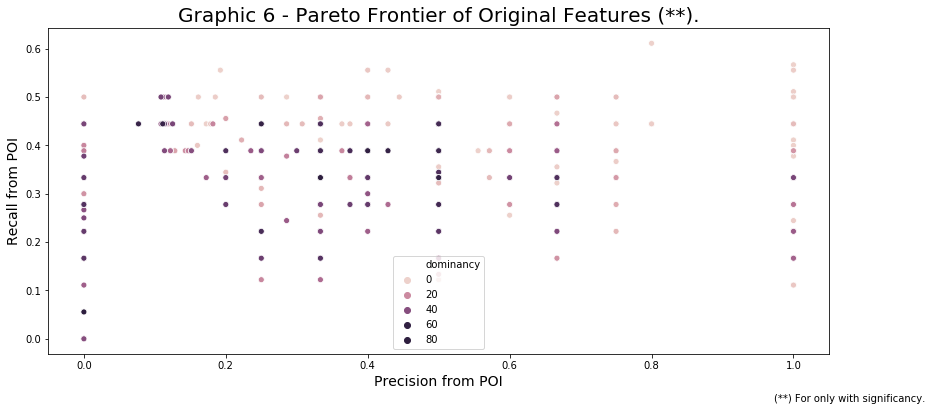

In [94]:
# Plottling the Pareto frontier.
plot_pareto(df = df_metrics_original, title = "Graphic 6 - Pareto Frontier of Original Features (**).",
            x_label = 'Precision from POI', y_label = 'Recall from POI',
            var_1 = 'precision_poi', var_2 = 'recall_poi', hue = 'dominancy',
            footnote = '(**) For only with significancy.');

Although this algorithm uses 6 dimensions to evaluate each chromosome the plot using a regular 2D scatterplot provided a good view of the results. Analyzing the solutions with low dominance values, there is a visible trade-off (Pareto Frontier) between Recall and Precision, as expected from an output of _a posteriori_ Genetic Algorithm.

Let's dive on the solutions histograms.

In [95]:
# Simple function to plot histograms.
def plot_histogram(df, title, x_label, y_label, var_1 , var_2):
    """
    Simple histogram.
    """
    plt.figure(figsize = [14, 6])
    sns.distplot(df[var_1])
    sns.distplot(df[var_2])
    plt.legend(('POI','non-POI'));
    plt.xlabel(x_label, fontsize = 14);
    plt.ylabel(y_label, fontsize = 14);
    plt.title(title, fontsize = 20);

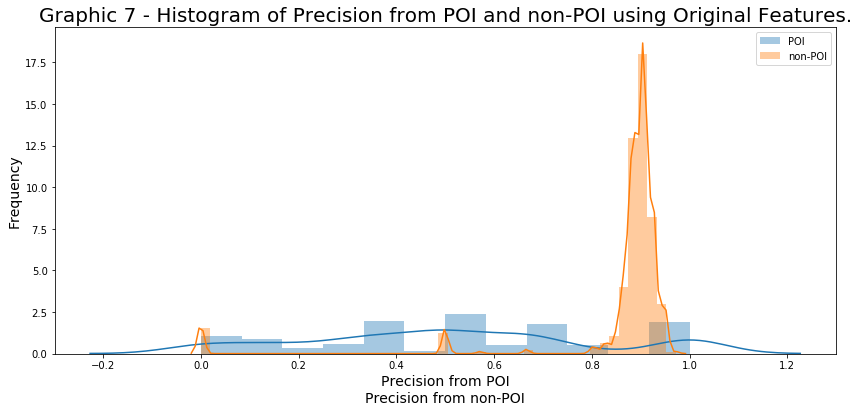

In [96]:
# Plotting the Precision's Histogram.
plot_histogram(df = df_metrics_original, title = 'Graphic 7 - Histogram of Precision from POI and non-POI using Original Features.',
               x_label = 'Precision from POI\nPrecision from non-POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'precision_non_poi')

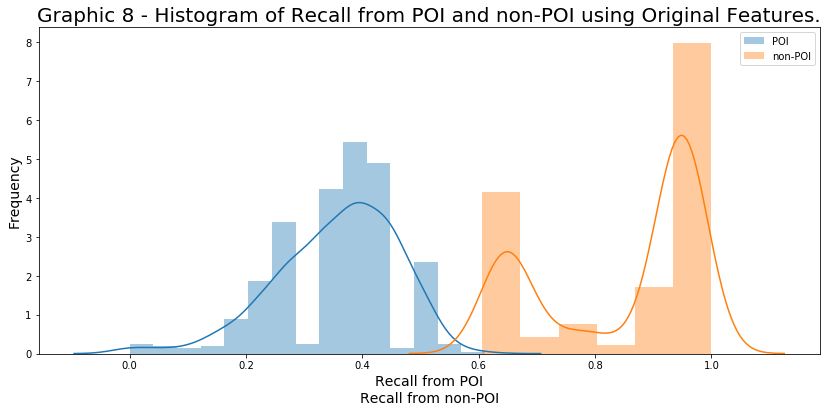

In [97]:
# Plotting the Recall's Histogram.
plot_histogram(df = df_metrics_original, title = 'Graphic 8 - Histogram of Recall from POI and non-POI using Original Features.',
               x_label = 'Recall from POI\nRecall from non-POI', y_label = 'Frequency',
               var_1 = 'recall_poi', var_2 = 'recall_non_poi')

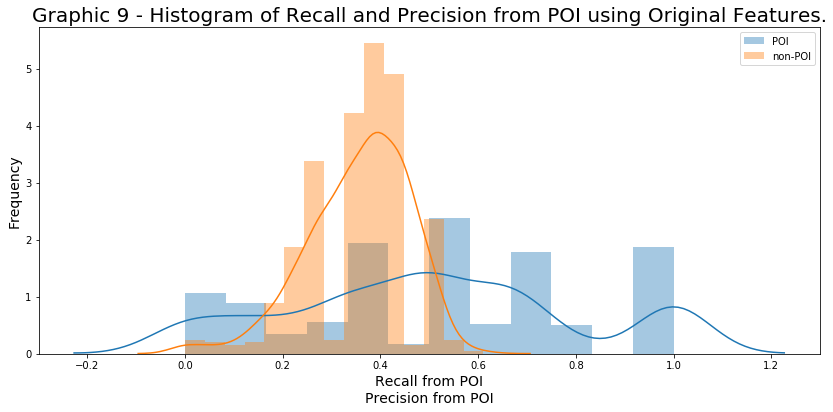

In [98]:
# Comparison Histogram of Recall and Precision.
plot_histogram(df = df_metrics_original, title = 'Graphic 9 - Histogram of Recall and Precision from POI using Original Features.',
               x_label = 'Recall from POI\nPrecision from POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'recall_poi')

The histograms comparison are quite complicated to understand because of the imbalance between POI and non-POI. I have not divided the dataset into several folds because it could drive a huge variation in percentages for each false positive or false negative.

Using `random_state=42` and folds equal to 3, I have in `label_test`:

* 5 POI, and;
* 38 Non-POI.

>What it means?

For each miss classify in any POI there are a huge variation in percentage in Recall and/or Precision (assuming no errors in non-POI), for instance, a 20% drop in recall/precision. On the other hand, the non-POI have a lower effect if any of the non-POI incur to be miss-classified, for instance, a 2.63% drop in recall/precision.

In [99]:
# Printing information about number of POI and non-POI.
print "Number of POI:", int(sum(labels))
print "Number of non-POI:", int(len(labels) - sum(labels))
print "Total Number of Observations:", int(len(labels))

Number of POI: 18
Number of non-POI: 125
Total Number of Observations: 143


I have filtered the solutions to show candidates with recall and precision greater than 0.5 and from second and first frontiers.

In [100]:
# Filtering solutions with means greater of equal to 0.3.
df_metrics_original.iloc[:,:7].query('precision_non_poi >= 0.3')\
                              .query('precision_poi >= 0.5')\
                              .query('recall_non_poi >= 0.3')\
                              .query('recall_poi >= 0.5')\
                              .query('dominancy <= 2')\
                              .sort_values(['recall_poi', 'precision_poi'], ascending = False)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy
862,0.631501,0.952381,0.8,0.634727,0.611111,5,1
14,0.640609,0.894737,1.0,0.647619,0.566667,3,1
848,0.620202,0.883721,1.0,0.631354,0.555556,4,2
1011,0.633333,0.897436,1.0,0.648148,0.511111,6,2
6,0.642722,0.902439,0.5,0.657895,0.511111,4,1
599,0.665928,0.891304,1.0,0.690476,0.500000,5,1
50,0.629125,0.926829,1.0,0.649573,0.500000,5,1
430,0.615942,0.909091,1.0,0.633333,0.500000,5,2
417,0.742465,0.911111,1.0,0.777778,0.500000,8,2
81,0.635843,0.918919,0.6,0.657407,0.500000,4,1


Now, let's compare the features selected by the chromosomes.

In [101]:
# Solutions with the lowest number of features.
original_final = pop_original.loc[:,[862, 14, 848, 1011, 6, 599, 99]]

# Adding index to turn it more understandable.
original_final.index = features_significant_original[1:]

# Printing.
original_final

,862,14,848,1011,6,599,99
exercised_stock_options,0,1,1,0,1,1,1
total_stock_value,1,0,0,0,0,0,0
bonus,0,0,0,1,0,0,0
salary,0,0,0,1,0,0,1
deferred_income,1,1,1,1,1,1,0
long_term_incentive,0,0,0,0,0,0,0
restricted_stock,1,0,0,0,0,1,0
total_payments,1,0,0,0,0,1,0
shared_receipt_with_poi,0,0,0,1,1,0,0
loan_advances,1,1,1,1,1,1,0


Looking at the results it is possible to see the same feature in several candidates. It could help me to select the most balanced set of features.

So, I have picked chromosome 14:

* Accuracy: 0.640609
* Precision non-POI: 0.894737	
* Precision POI: 1.000000	
* Recall non-POI: 0.647619
* Recall POI: 0.566667
* Quantity of features: 3

The reason to select this chromosome is due to the minimal number of features and the balance between `precision_poi` and `recall_poi`. The chosen solution has `exercised_stock_options`, `deferred_income`, and `loan_advances`.

In [102]:
# Final set of features using the original feature list.
original_final.loc[:,[14]]

,14
exercised_stock_options,1
total_stock_value,0
bonus,0
salary,0
deferred_income,1
long_term_incentive,0
restricted_stock,0
total_payments,0
shared_receipt_with_poi,0
loan_advances,1


Comparing the results with the output of `SelectKBest`.

In [103]:
# Subsetting and joining the chosen set of features. 
original_nsga2_selectkbest = feat_sel_results.query('p_values < 0.05')
original_nsga2_selectkbest.index = original_nsga2_selectkbest.feature.tolist()
original_nsga2_selectkbest = original_nsga2_selectkbest.drop(columns = ['feature','hue'])
original_nsga2_selectkbest.join(original_final.loc[:,[14]])

,scores,p_values,14
exercised_stock_options,24.815080,0.000002,1
total_stock_value,24.182899,0.000002,0
bonus,20.792252,0.000011,0
salary,18.289684,0.000035,0
deferred_income,11.458477,0.000922,1
long_term_incentive,9.922186,0.001994,0
restricted_stock,9.212811,0.002863,0
total_payments,8.772778,0.003589,0
shared_receipt_with_poi,8.589421,0.003946,0
loan_advances,7.184056,0.008232,1


As you can see, the solution selected using the NSGA2 algorithm does not have much in common with the output from `SelectedKbest`.

##### 3.4.3.2. Selecting Features from `features_significant_complete`

Analogous to what I have done in `3.4.3.1.` for `features_significant_original`, but now with `features_significant_complete`.

In [104]:
# Defining random seed.
np.random.seed(42)

# Running the Algorithm Genetic.
df_metrics_complete, pop_complete = NSGA2(10, 500, features_significant_complete, 0.2)

=========== Initializing the Population ===========
Population Size: 500
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.

============== Aging the Population ===============

Generation: 0
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 65
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 517

Generation: 1
----------
Population after Crossing Over: 999
Population after Mutation: 1099
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 82
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 561

Generation: 2
----------
Population after Crossing Over: 999
Population after Mutation: 1099
Calculating Accu

Let's have a look at the results using the complete list of features.

In [105]:
# First 5 rows.
df_metrics_complete.sort_values('dominancy').head(10)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy,crow_dist
257,0.884058,0.952381,1.000000,0.958333,0.388889,5,1,1.000000e+09
100,0.891921,0.974359,0.714286,0.958537,0.444444,4,1,1.000000e+09
498,0.861522,0.860465,0.000000,1.000000,0.000000,5,1,3.000000e+09
490,0.620155,0.897436,0.500000,0.639640,0.500000,4,1,1.403230e-01
254,0.637681,0.909091,1.000000,0.658333,0.500000,5,1,1.000000e+09
34,0.887855,0.948718,0.750000,0.957040,0.422222,3,1,8.431591e-02
294,0.769208,0.925000,0.428571,0.808750,0.500000,8,1,1.000000e+09
121,0.612266,0.926829,1.000000,0.631579,0.466667,4,1,1.000000e+09
148,0.891304,0.926829,0.600000,0.966667,0.388889,4,1,6.829710e-02
286,0.895263,0.948718,0.750000,0.957040,0.477778,4,1,3.119551e-02


Let's plot the Pareto Frontier.

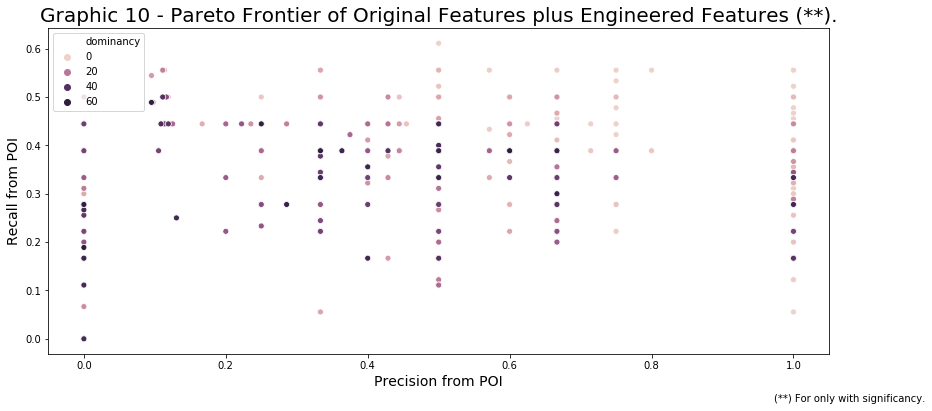

In [106]:
# Plotting the Pareto frontier.
plot_pareto(df = df_metrics_complete, title = "Graphic 10 - Pareto Frontier of Original Features plus Engineered Features (**).",
            x_label = 'Precision from POI', y_label = 'Recall from POI',
            var_1 = 'precision_poi', var_2 = 'recall_poi', hue = 'dominancy',
            footnote = '(**) For only with significancy.')

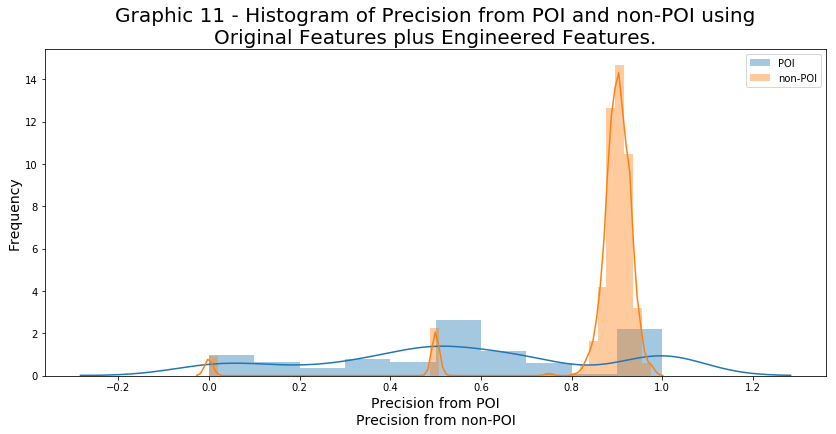

In [107]:
# Plotting the Precision's Histogram.
plot_histogram(df = df_metrics_complete,
               title = 'Graphic 11 - Histogram of Precision from POI and non-POI using\nOriginal Features plus Engineered Features.',
               x_label = 'Precision from POI\nPrecision from non-POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'precision_non_poi')

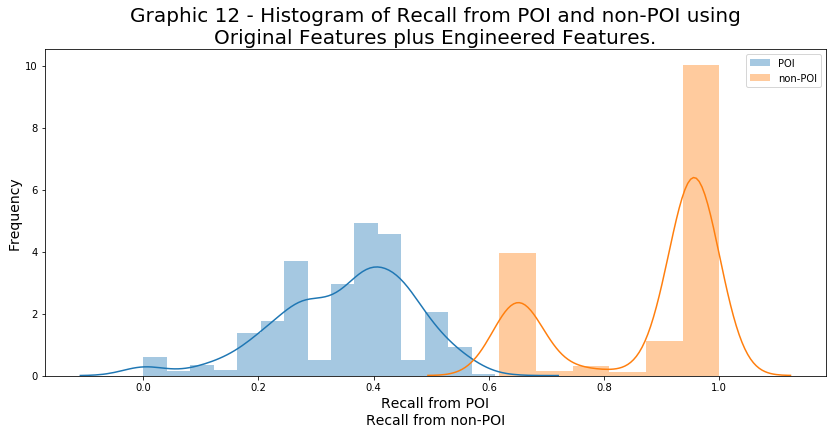

In [108]:
# Plotting the Recall's Histogram.
plot_histogram(df = df_metrics_complete,
               title = 'Graphic 12 - Histogram of Recall from POI and non-POI using\nOriginal Features plus Engineered Features.',
               x_label = 'Recall from POI\nRecall from non-POI', y_label = 'Frequency',
               var_1 = 'recall_poi', var_2 = 'recall_non_poi')

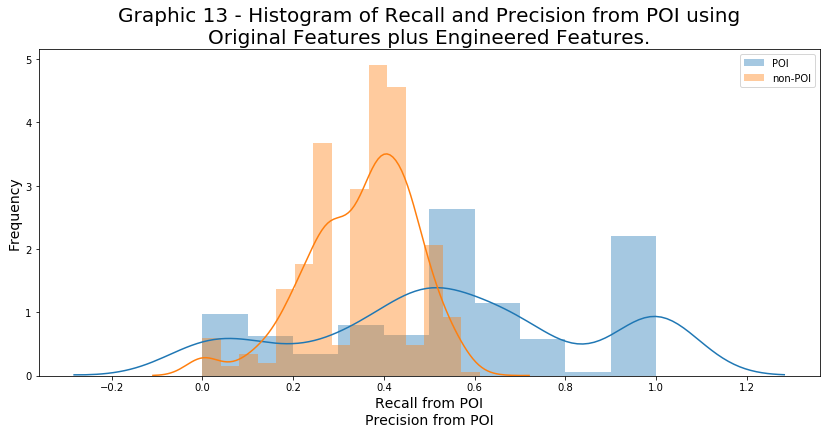

In [109]:
# Comparison Histogram of Recall and Precision.
plot_histogram(df = df_metrics_complete,
               title = 'Graphic 13 - Histogram of Recall and Precision from POI using\nOriginal Features plus Engineered Features.',
               x_label = 'Recall from POI\nPrecision from POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'recall_poi')

Filtering the solution to show the chromosomes with `precision_poi` and `recall_poi` greater than 0.5.

In [110]:
# Filtering solutions.
df_metrics_complete.iloc[:,:7].query('precision_non_poi >= 0.3')\
                              .query('precision_poi >= 0.5')\
                              .query('recall_non_poi >= 0.3')\
                              .query('recall_poi >= 0.5')\
                              .query('dominancy <= 2')\
                              .sort_values(['recall_poi', 'precision_poi'], ascending = False)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy
363,0.737589,0.888889,0.500000,0.756098,0.611111,7,1
168,0.652174,0.888889,1.000000,0.666667,0.555556,4,1
982,0.617330,0.930233,1.000000,0.626016,0.555556,5,1
83,0.736972,0.928571,0.750000,0.764024,0.555556,6,1
409,0.638452,0.906977,0.666667,0.650407,0.555556,5,2
41,0.644002,0.904762,0.500000,0.658130,0.555556,5,2
827,0.631514,0.951220,0.800000,0.642073,0.555556,5,1
403,0.630435,0.948718,0.571429,0.641667,0.555556,8,2
954,0.687855,0.948718,0.750000,0.709177,0.533333,5,1
633,0.628596,0.926829,1.000000,0.641026,0.522222,5,1


Now, let's compare the features selected for each candidate/chromosome.

In [111]:
# Solutions with the lowest number of features.
complete_final = pop_complete.loc[:,[363, 168, 982, 83, 409, 41, 827, 403, 954, 633, 254, 368, 5, 221, 490]]

# Adding index to be more understandable.
complete_final.index = features_significant_complete[1:]

# Printing.
complete_final

,363,168,982,83,409,41,827,403,954,633,254,368,5,221,490
exercised_stock_options,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0
total_stock_value,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1
bonus,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
salary,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
deferred_income,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
long_term_incentive,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
restricted_stock,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
total_payments,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shared_receipt_with_poi,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
loan_advances,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


The solution seems to be in consonance with the `features_significant_original`, many candidates also has `deferred_income` and `loan_advances`, but there is more candidate with `total_stock_value`.

So, I have picked chromosome 633:

* Accuracy: 0.628596
* Precision non-POI: 0.926829	
* Precision POI: 1.000000	
* Recall non-POI: 0.641026
* Recall POI: 0.522222
* Quantity of features: 5

The main reason to select this candidate is due to the similarities with chromosome 14 from `features_significant_original`. The chosen solution has `exercised_stock_options`, `deferred_income`, `loan_advances`, `ratio_to_from`, and `ratio_to_poi`.

Comparing the results from the output of `SelectKBest`.

In [112]:
# Subsetting and joining data to create a comparison.
complete_nsga2_selectkbest = feat_sel_results_complete.query('p_values < 0.05')
complete_nsga2_selectkbest.index = complete_nsga2_selectkbest.feature.tolist()
complete_nsga2_selectkbest = complete_nsga2_selectkbest.drop(columns = ['feature','hue'])
complete_nsga2_selectkbest.join(complete_final.loc[:,[633]])

,scores,p_values,633
exercised_stock_options,24.815080,0.000002,1
total_stock_value,24.182899,0.000002,0
bonus,20.792252,0.000011,0
salary,18.289684,0.000035,0
deferred_income,11.458477,0.000922,1
long_term_incentive,9.922186,0.001994,0
restricted_stock,9.212811,0.002863,0
total_payments,8.772778,0.003589,0
shared_receipt_with_poi,8.589421,0.003946,0
loan_advances,7.184056,0.008232,1


This solution selected using the NSGA2 algorithm does not have much in common If I have selected the features with the highest p-value from the `SelectKBest`.

#### 3.4.5. Genetic Algorithm Solutions <a id='ag_solutions'></a>

The difference between the results using the `features_significant_original` and `features_significant_complete` was shown below.

In [113]:
# Printing the variables selected from each solution.
complete_final.loc[:,[633]].join(original_final.loc[:,[14]])

,633,14
exercised_stock_options,1,1.0
total_stock_value,0,0.0
bonus,0,0.0
salary,0,0.0
deferred_income,1,1.0
long_term_incentive,0,0.0
restricted_stock,0,0.0
total_payments,0,0.0
shared_receipt_with_poi,0,0.0
loan_advances,1,1.0


Creating lists to be used in the report as input.

In [114]:
# Function to extract the features based on the chromosome.
def select_chromosome(df, chromosome_id, feat_list):
    """
    
    """
    # Subsetting the results from features_significant_original
    chromosome_select = df.loc[:,chromosome_id].tolist()

    # Converting 0/1 to False/True
    chromosome_select = map(lambda x : bool(x), chromosome_select)

    # Subsetting to DataFrame. Removing the first element ('poi').
    chromosome_select = pd.DataFrame(feat_list[1:], columns = ['features']).iloc[chromosome_select]

    # Converting to list.
    chromosome_select = chromosome_select.features.tolist()

    # Adding 'poi'
    chromosome_select = ['poi'] + chromosome_select
    
    return chromosome_select

Let's create the lists of features of these two candidates.

In [115]:
# Creating the list of features using the chormosome 14.
chromosome_14 = select_chromosome(original_final, 14, features_significant_original)

chromosome_14

['poi', 'exercised_stock_options', 'deferred_income', 'loan_advances']

In [116]:
# Creating the list of features using the chormosome 633.
chromosome_633 = select_chromosome(complete_final, 633, features_significant_complete)

chromosome_633

['poi',
 'exercised_stock_options',
 'deferred_income',
 'loan_advances',
 'ratio_to_from',
 'ratio_to_poi']

#### 3.4.6. Sensible Analysis <a id='sensible_analysis'></a>

In this item, I have compared the chromosomes 14 and 633 to identify, which one is the most up-and-coming to define the `feature_list`. As part of my general understanding, I have also compared the `features_significant_original` and `features_significant_complete` set of features, just to assure that an overfitted model outcomes are worse than a model with fewer features.

##### Comparison Method 

I have read several threads from Stack Overflow and Cross Validation to guide me how to evaluate/compare two models, the most valuable threads and paper:

* [Understanding Stratified Cross Validation][thread_1];
* [Why use stratified cross validation? Why does this not damage variance related][thread_2], and;
* [A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection (Kohavi, R.)][paper].

I have also read the chapter 4.4. from the book _Applied Predictive Modeling_ (Kuhn, M. and Johnson, K.) to understand a way to draw conclusions about the population of possible results of my model.

The evaluation process has two steps:

* Monte Carlo to create a `df_sample`, and;
* Bootstrapping the `df_sample` to estimate the population statistics.

It is much appropriate to use the `StratifiedKFolds` in cross-validation and the `StratifiedShuffleSplit` in case of modelling (tuning the parameters).

[thread_1]: https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation
[thread_2]: https://stats.stackexchange.com/questions/117643/why-use-stratified-cross-validation-why-does-this-not-damage-variance-related-b
[paper]: http://web.cs.iastate.edu/~jtian/cs573/Papers/Kohavi-IJCAI-95.pdf

##### Simulations Settings

* Regular Naïve Bayes (without any parameter);
* 500 Monte Carlo Simulations to create the `data_sample`, each sample is a mean of `n_splits` metrcis of the Stratified KFolds;
* I have sampled 500 observations from `data_sample` and calculate the `mean()`, this step will be repeated 15,000 times;
* Plot histograms to see the distribution, and;
* Draw conclusions.

In [117]:
# Function to create data_sample using Monte Carlo Simulations.
def monte_carlo(module, feat, lab, n_sample, n_splits, classifier,
                     random_state = None, test_size = 0.25, parameters = parameters):
    """
    Runs several simulations of Monte Carlo varying the training dataset and test dataset.
    """
    # Temporaly variable to store the metrics.
    data_sample = []

    # Creating a data sample.
    for i in range(0, n_sample):
        
        # Calculating the metrics: Accuracy, recall, and precision.
        data_sample.append(fit_evaluation(module = module,
                                          feat = feat, lab = lab,
                                          n_splits = n_splits,
                                          classifier = classifier,
                                          random_state = random_state,
                                          test_size = test_size))

    # Unzipping the list.
    df_sample = zip(*data_sample)

    # Converting df_sample to DataFrame.
    df_sample = pd.DataFrame(df_sample,
                             index = ['accuracy',
                                      'recall_non_poi',
                                      'recall_poi',
                                      'precision_non_poi',
                                      'precision_poi']).T
    
    # Returning a DataFrame.
    return df_sample

Based on the function used to create the `data_sample`, the bootstrap could be performed.

In [118]:
# Bootstrapping.
def bootstrapping(df, m_sample, n_sample):
    """
    Runs the Bootstrapping of df dataframe.
    """
    
    # List to store the results.
    bt_result = []

    # Loop to calculate the average of n_samples.
    for index in range(m_sample):
        
        # Calculating mean from several metrics.
        acc = df.sample(n_sample, replace = True).accuracy.mean()
        rec_poi = df.sample(n_sample, replace = True).recall_poi.mean()
        rec_non_poi = df.sample(n_sample, replace = True).recall_non_poi.mean()
        prec_poi = df.sample(n_sample, replace = True).precision_poi.mean()
        prec_non_poi = df.sample(n_sample, replace = True).precision_non_poi.mean()
        
        # Appending the averages in the list.
        bt_result.append(np.array([acc, rec_non_poi, rec_poi, prec_non_poi, prec_poi]))

    # Converting bt_result in DataFrame.
    bt_result = pd.DataFrame(bt_result,
                             columns = ['accuracy',
                                        'recall_non_poi',
                                        'recall_poi',
                                        'precision_non_poi',
                                        'precision_poi'])
    
    
    # Returning DataFrame.
    return bt_result

#### 3.4.6.1. Bootstrapping the Original Features.

Let's recall the features from `features_significant_original`.

In [119]:
features_significant_original

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'bonus',
 'salary',
 'deferred_income',
 'long_term_incentive',
 'restricted_stock',
 'total_payments',
 'shared_receipt_with_poi',
 'loan_advances',
 'expenses',
 'from_poi_to_this_person',
 'other']

In [120]:
# Reproducibility
np.random.seed(42)

# Creating the dataset of features and the vector of lables.
lab_original, feat_original = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = features_significant_original)

# Calculating the sample data.
df_sample = monte_carlo(module = 'skfolds',
                        feat = feat_original, lab = lab_original,
                        n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_original = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

I have created a function to plot several histograms in a single graphic.

In [121]:
# Create a Histogram Matrix Graphic.
def plot_hist_matrix(df, title = '', legend = '', list_subtitle = ['Accuracy',
                                                                   'Recall non-POI',
                                                                   'Recall POI',
                                                                   'Precision non-POI',
                                                                   'Precision POI']):
    """
    This function plot a kinf of "matrix" of histograms.
    """
    # Creating subplots.
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize = [14, 12])

    ax1 = axs[2, 0] # accuracy
    ax2 = axs[1, 1] # recall_non_poi
    ax3 = axs[0, 1] # recall_poi
    ax4 = axs[1, 0] # precision_non_poi
    ax5 = axs[0, 0] # precision_poi

    # Configuration: Vertical Space between subplots.
    plt.subplots_adjust(hspace = 0.2)

    # List of subplots to be used in for loop.
    list_ax = [ax1, ax2, ax3, ax4, ax5]
    
    # Loop to plot each histogram once a time.
    for i in range(0, df.shape[1]):
        sns.distplot(np.array(df.iloc[:,i]), ax = list_ax[i])
        list_ax[i].set_title(list_subtitle[i])
        list_ax[i].legend(legend)
        list_ax[i].axvline(x = np.array(df.iloc[:,i].mean()), color = 'r', linestyle = 'dashed')
    
    # Adding Title for the entire matrix of histogram.
    fig.suptitle(title, fontsize = 20);
    
    # Show.
    plt.show()
    
    return None

Let's plot the values obtained from the bootstrapping the `features_significant_original`.

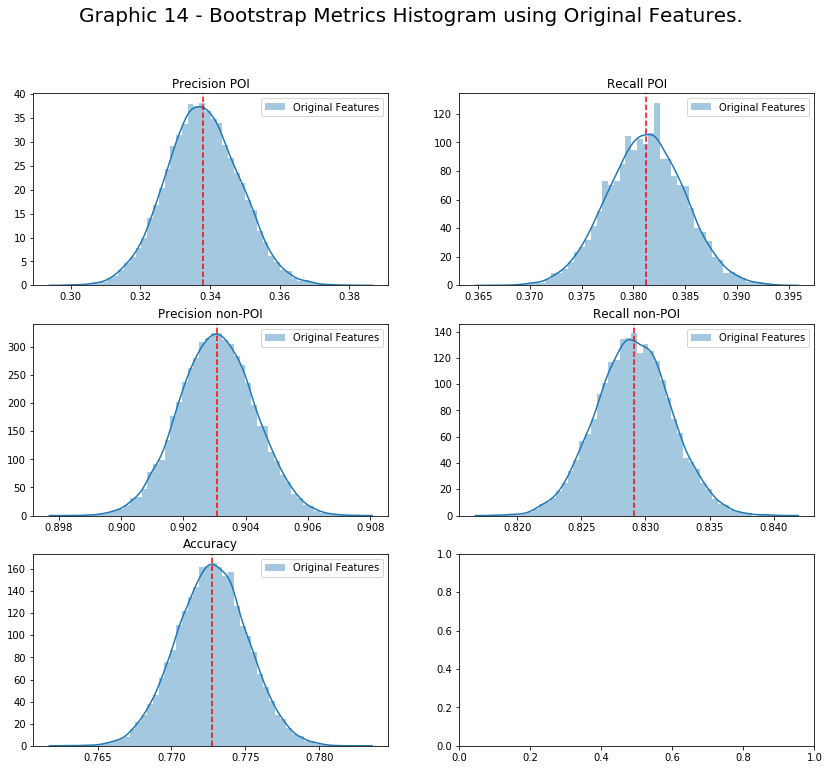

In [122]:
# Plotting a matrix of histogram.
plot_hist_matrix(df = df_bt_original,
                 title = 'Graphic 14 - Bootstrap Metrics Histogram using Original Features.',
                 legend = ['Original Features'])

The values observed using all features with significance (`features_significant_original`) are the baseline for further analysis. Table 1 shows the values.


<strong><center>Table 1 - Metrics obtained from Bootstrapping the Original Features.</center></strong>

|Metric|Type|Original|
|:-:|:-:|:-:|
|Precision|POI|33.79%|
|Precision|non-POI|90.31%|
|Recall|POI|38.12%|
|Recall|non-POI|82.91%|
|Accuracy|-|77.27%|

In [123]:
# Printing the values fo confirm the table 1.
print "Precision POI:", round(df_bt_original.precision_poi.mean(), 4)
print "Precision non-POI:", round(df_bt_original.precision_non_poi.mean(), 4)
print "Recall POI:", round(df_bt_original.recall_poi.mean(), 4)
print "Recall non-POI:", round(df_bt_original.recall_non_poi.mean(), 4)
print "Accuracy:", round(df_bt_original.accuracy.mean(), 4)

Precision POI: 0.3379
Precision non-POI: 0.9031
Recall POI: 0.3812
Recall non-POI: 0.8291
Accuracy: 0.7727


Creating a function to store the results.

In [124]:
# Record results.
def record_results(df, col_name):
    """
    This function crates a dataframe of results of each simulation.
    """
    # Temporaly list to store the variables.
    df_results_temp = []

    # Loop to calculate the mean of all metrics.
    df_results_temp.append(np.array([df.precision_poi.mean(),\
                                     df.precision_non_poi.mean(),\
                                     df.recall_poi.mean(),\
                                     df.recall_non_poi.mean(),\
                                     df.accuracy.mean()] ))
    
    # Converting the list in pandas DataFrame. Adding col name and index name.
    df_results_temp = pd.DataFrame(df_results_temp,
                                   index = [col_name], 
                                   columns = ['Precision POI', 'Precision non-POI',
                                              'Recall POI', 'Recall non-POI',
                                              'Accuracy']).T
    
    # Returning.
    return df_results_temp

In [125]:
# Storing the results in df_results.
df_results = record_results(df_bt_original, 'Original')

#### 3.4.6.2. Bootstrapping the Complete Features.

Let's recall `features_significant_complete`.

In [126]:
features_significant_complete

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'bonus',
 'salary',
 'deferred_income',
 'long_term_incentive',
 'restricted_stock',
 'total_payments',
 'shared_receipt_with_poi',
 'loan_advances',
 'expenses',
 'ratio_from_poi_share',
 'ratio_to_from',
 'from_poi_to_this_person',
 'ratio_from_poi',
 'other',
 'ratio_to_poi']

Replicating the procedures made in `features_significant_original` to `features_significant_complete`.

In [127]:
# Creating the dataset of features and the vector of lables.
lab_complete, feat_complete = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = features_significant_complete)

# Calculating the sample data.
df_sample = monte_carlo(module = 'skfolds',
                        feat = feat_complete, lab = lab_complete,
                        n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_complete = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

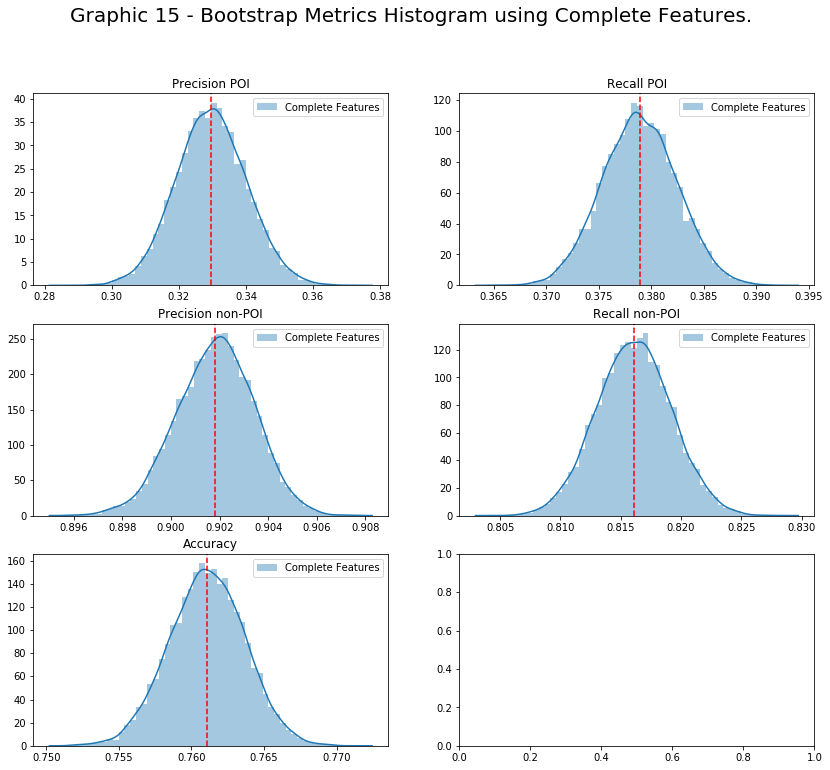

In [128]:
# Plotting a Matrix of Histograms.
plot_hist_matrix(df = df_bt_complete,
                 title = 'Graphic 15 - Bootstrap Metrics Histogram using Complete Features.',
                 legend = ['Complete Features'])

As you can see, the graphics are very similar to `features_significant_original`.

<strong><center>Table 2 - Metrics obtained from Bootstrapping the Complete Features.</center></strong>

|Metric|Type|Original|Complete|
|:-:|:-:|:-:|:-:|
|Precision|POI|33.79%|32.97%|
|Precision|non-POI|90.31%|90.18%|
|Recall|POI|38.12%|37.89%|
|Recall|non-POI|82.91%|81.16%|
|Accuracy|-|77.27%|76.10%|

In [129]:
# Printing the values fo confirm the table 2.
df_results = df_results.join(record_results(df_bt_complete, 'Complete'))

df_results

,Original,Complete
Precision POI,0.337898,0.329693
Precision non-POI,0.903080,0.901829
Recall POI,0.381191,0.378878
Recall non-POI,0.829080,0.816114
Accuracy,0.772740,0.761072


Although the values are quite similar, I must use the A/B Testing to ensure the study. For this reason, I have coded the function plot_diff_hist_matrix to plot the differences (between `features_significant_original` and `features_significant_complete`) and the normal distribution (center in zero with the same standard deviation of the differences) to compare it.

In [130]:
# Create a Histogram Matrix Graphic.
def plot_diff_hist_matrix(df_1, df_2, title = '', legend = (['Difference','Normal']),
                          list_subtitle = ['Accuracy', 'Recall non-POI', 'Recall POI', 'Precision non-POI', 'Precision POI']):
    """
    Performs the subtraction of the dataframes variables and later draw a histogram.
    For each histogram I have also ploted the normal distribution center in zero with
    standard deviation equal to the difference sample.
    """
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize = [14, 12])

    ax1 = axs[2, 0] # accuracy
    ax2 = axs[1, 1] # recall_non_poi
    ax3 = axs[0, 1] # recall_poi
    ax4 = axs[1, 0] # precision_non_poi
    ax5 = axs[0, 0] # precision_poi

    plt.subplots_adjust(hspace = 0.2)

    list_ax = [ax1, ax2, ax3, ax4, ax5]
    
    for i in range(0, df_1.shape[1]):
        sns.distplot( np.array(df_1.iloc[:,i] ) - np.array(df_2.iloc[:,i] ), ax = list_ax[i])
        list_ax[i].set_title(list_subtitle[i])

        
        diff = np.array(df_1.iloc[:,i] ) - np.array(df_2.iloc[:,i])
                                            
        null_hyp = np.random.normal(0, np.std(diff) , 10000)
        
        sns.distplot(null_hyp, ax = list_ax[i])
        list_ax[i].legend(legend)
        list_ax[i].axvline(x = (np.array(df_1.iloc[:,i] ) - np.array(df_2.iloc[:,i])).mean(),
                           color = 'r',
                           linestyle = 'dashed')    
    
    fig.suptitle(title, fontsize = 20);
    
    plt.show()
    
    return None

Now, let's use the `features_significant_original` and `features_significant_complete`.

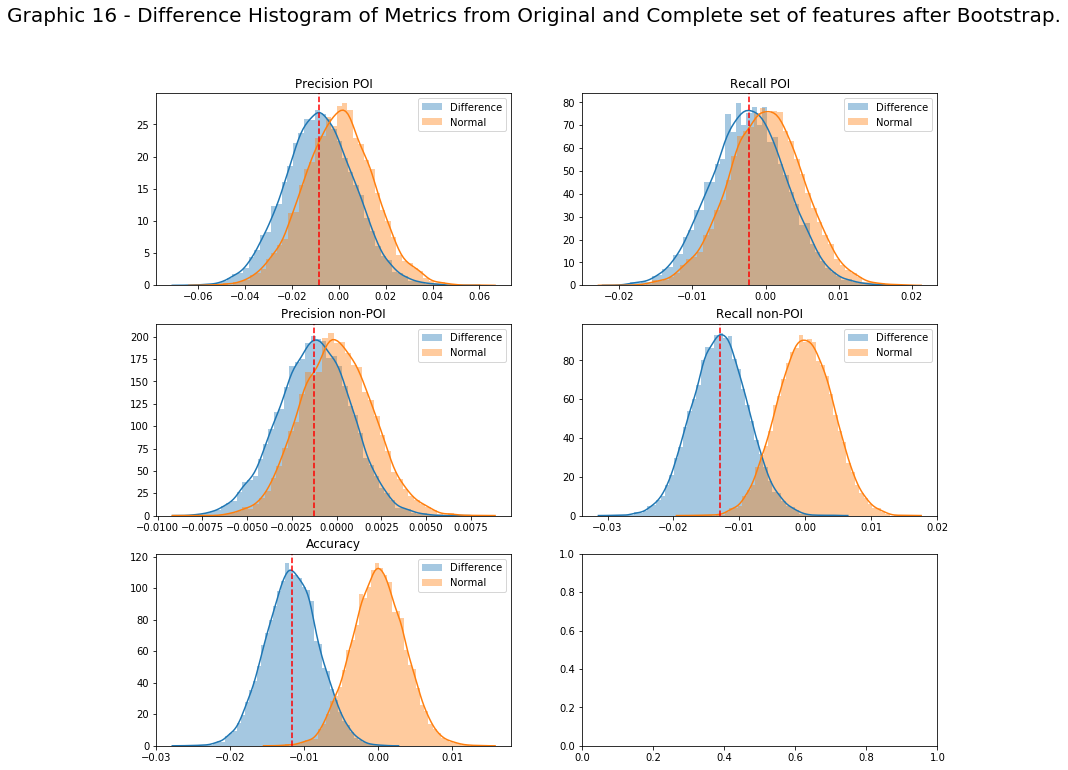

In [131]:
plot_diff_hist_matrix(df_1 = df_bt_complete, df_2 = df_bt_original,
                      title = 'Graphic 16 - Difference Histogram of Metrics from Original and Complete set of features after Bootstrap.')

I want to prove the `features_significant_complete` has better performance than the `features_significant_original`.

* Null Hypothesis: The `features_significant_original` has better or equal performance than the `features_significant_complete`.
* Alternative Hypothesis: The `features_significant_complete` is better than the `features_significant_original`.

Converting these statements in Hypothesis Testing:

$$H_0: p_{complete} - p_{original} \leq 0 $$
$$H_1: p_{complete} - p_{original} > 0 \tag{1}$$

Where:

* $p$ could be any features of interest (accuracy, recall non-poi, recall poi, precision non-poi, and precision poi).

The function `ab_testing` performs a straightforward hypothetical test for the given feature.

In [132]:
# Function to calculate the p-value for the given feature.
def ab_testing(df_1, df_2, feat, alpha = 0.05, n = 10000, show_graph = False):
    """
    This function calculates the p-values and print a straightforward report about
    each variable/feature.
    
    H0: df_1 - df_2 <= 0
    H1: df_1 - df_2 > 0
    """
    print "Feature:", feat
    print "-------"
    
    df_diff = df_1 - df_2

    h0 = np.random.normal(0, np.std(df_diff[feat]), 10000)
    
    p_value = (h0 > df_diff[feat].mean()).mean()
    
    if show_graph:
        sns.distplot(h0)
        plt.axvline(x = df_diff[feat].mean() , color = 'r', linestyle = 'dashed')
    
    if p_value >= alpha:
        print "Fail to reject the H0"
        
    else:
        print "Reject the H0"
    
    print "p-value:", p_value
    print "alpha:", alpha
    print "\n"
    
    return None    

Now, let's use it.

In [133]:
# Running the A/B Testing for all features.
for i in df_bt_complete.columns:
    ab_testing(df_bt_complete, df_bt_original, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 0.9994
alpha: 0.05


Feature: recall_non_poi
-------
Fail to reject the H0
p-value: 0.9987
alpha: 0.05


Feature: recall_poi
-------
Fail to reject the H0
p-value: 0.672
alpha: 0.05


Feature: precision_non_poi
-------
Fail to reject the H0
p-value: 0.7339
alpha: 0.05


Feature: precision_poi
-------
Fail to reject the H0
p-value: 0.7133
alpha: 0.05




All tests have failed to reject the null hypothesis, which means I do not have statistical evidence to affirm the `features_significant_complete` has better performance than `features_significant_original`.

#### 3.4.6.3. Bootstrapping the Chromosome 14

Let's recall chromosome 14.

In [134]:
# Features selected after NSGA2 using only original features (without any engineered feature).
chromosome_14

['poi', 'exercised_stock_options', 'deferred_income', 'loan_advances']

Following the same specifications of previous simulations.

In [135]:
# Creating the dataset of features and the vector of lables.
lab_14, feat_14 = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = chromosome_14)

# Calculating the sample data.
df_sample = monte_carlo(module = 'skfolds',
                        feat = feat_14, lab = lab_14,
                        n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_14 = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

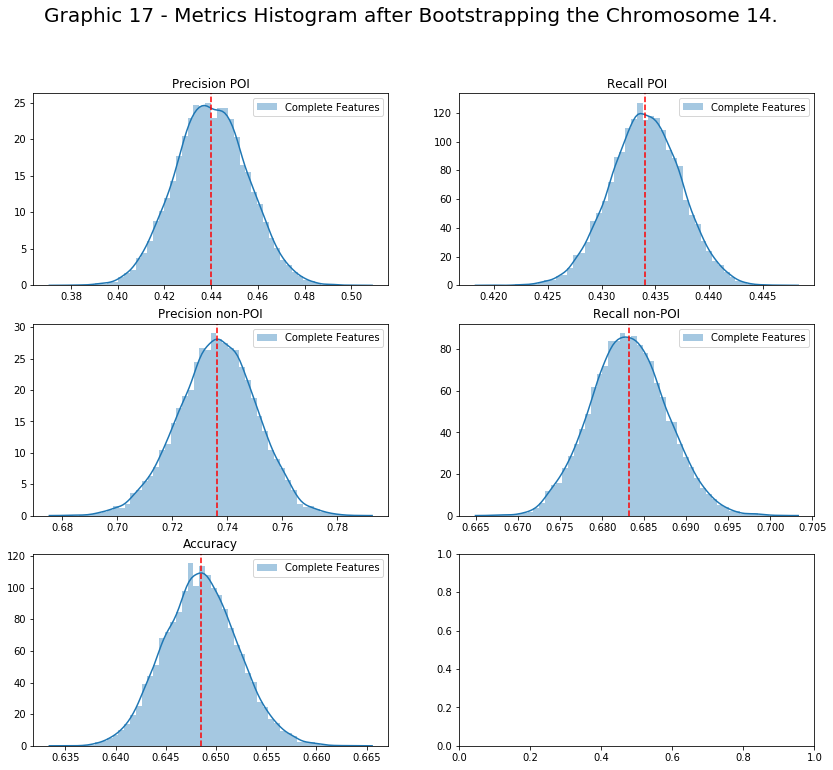

In [136]:
# Plotting the Matrix of Histogram.
plot_hist_matrix(df = df_bt_14,
                 title = 'Graphic 17 - Metrics Histogram after Bootstrapping the Chromosome 14.',
                 legend = ['Complete Features'])

I have noticed a clear improvement in `precision_poi` and `recall_poi`, on the other hand, the `precision_non_poi` and `recall_non_poi` have dropped. There is a trade-off between these metrics and I hope after tuning the classifier I could reach better results.

<strong><center>Table 3 - Metrics obtained from Bootstrapping the Chromosome 14.</center></strong>

|Metric|Type|Original|Complete|Chromosome 14|
|:-:|:-:|:-:|:-:|:-:|
|Precision|POI|38.68%|38.48%|44.01%|
|Precision|non-POI|89.34%|89.52%|73.63%|
|Recall|POI|37.12%|36.44%|43.40%|
|Recall|non-POI|83.45%|84.17%|68.32%|
|Accuracy|-|77.02%|77.53%|64.85%|

In [137]:
# Printing the values fo confirm the table 3.
df_results = df_results.join(record_results(df_bt_14, 'Chromosome 14'))

df_results

,Original,Complete,Chromosome 14
Precision POI,0.337898,0.329693,0.440059
Precision non-POI,0.903080,0.901829,0.736302
Recall POI,0.381191,0.378878,0.434084
Recall non-POI,0.829080,0.816114,0.683167
Accuracy,0.772740,0.761072,0.648520


I want to compare the results of `chromosome_14` and the `features_significant_original`.

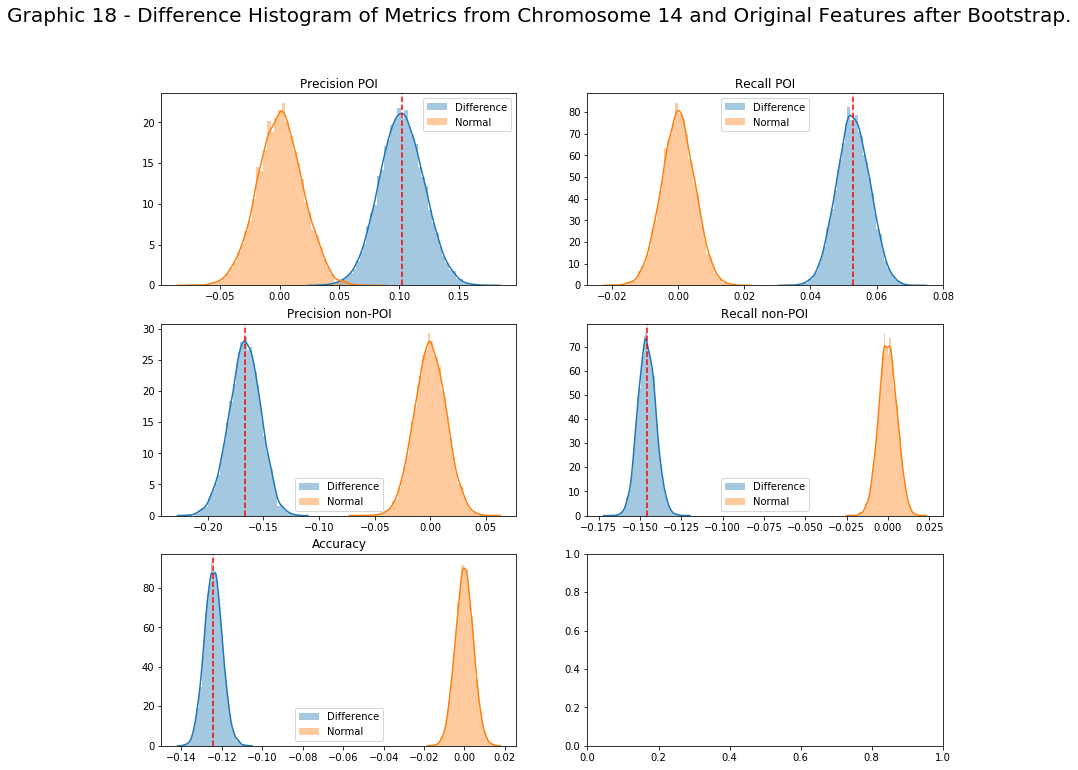

In [138]:
# Plotting histogram of difference.
plot_diff_hist_matrix(df_bt_14, df_bt_original,
                      title = 'Graphic 18 - Difference Histogram of Metrics from Chromosome 14 and Original Features after Bootstrap.')

Performing the A/B Testing to analyze the statistical significance.

In [139]:
# Testing all metrics. 
for i in df_bt_complete.columns:
    ab_testing(df_bt_14, df_bt_original, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: recall_non_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: recall_poi
-------
Reject the H0
p-value: 0.0
alpha: 0.05


Feature: precision_non_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: precision_poi
-------
Reject the H0
p-value: 0.0
alpha: 0.05




Comparing the outputs from `chromosome_14` and `features_significant_original`, there are statistical evidence that precision_poi and recall_poi from the `chromosome_14` are greater than `features_significant_original`. Which means decreasing the number of features lead to an enhancement of these two metrics, although the other metrics clearly became worse.

#### 3.4.6.4. Bootstrapping the Chromosome 633

Let's recall `chromosome_633`.

In [140]:
# Features selected after NSGA2 using only original features AND engineered features.
chromosome_633

['poi',
 'exercised_stock_options',
 'deferred_income',
 'loan_advances',
 'ratio_to_from',
 'ratio_to_poi']

Following the same specifications of previous simulations.

In [141]:
# Creating the dataset of features and the vector of lables.
lab_633, feat_633 = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = chromosome_633)

# Calculating the sample data.
df_sample = monte_carlo(module = 'skfolds',
                        feat = feat_633, lab = lab_633,
                        n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_633 = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

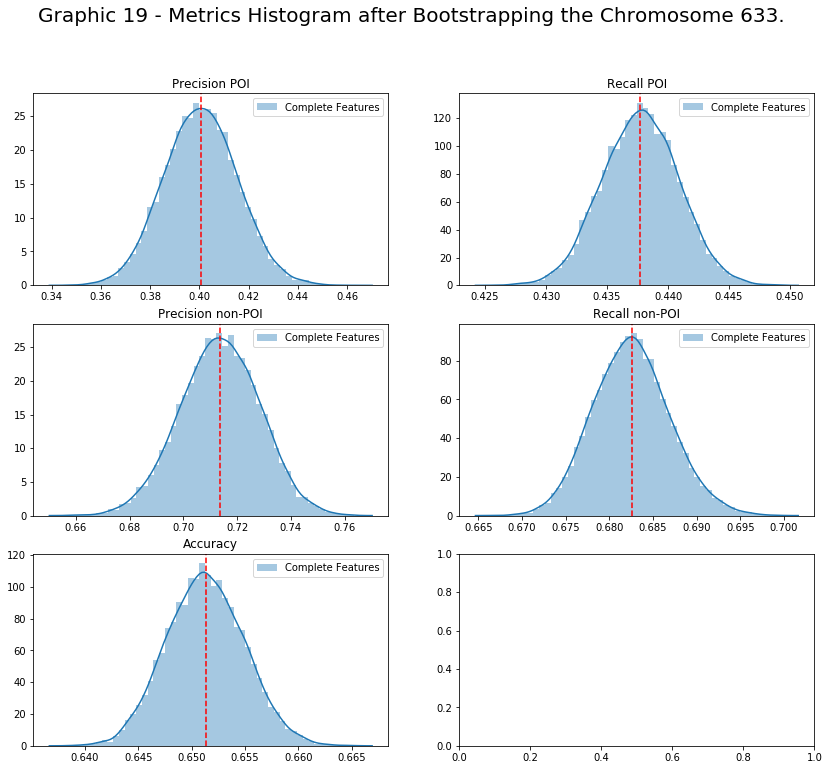

In [142]:
# Plotting the matrix of histograms.
plot_hist_matrix(df = df_bt_633,
                 title = 'Graphic 19 - Metrics Histogram after Bootstrapping the Chromosome 633.',
                 legend = ['Complete Features'])

This set of features from `chromosome_633` in all aspects has better metrics from the `chromosome_14`. "Seems" the addition of two new features improved the overall performance.

<strong><center>Table 4 - Metrics obtained from Bootstrapping the Chromosome 633.</center></strong>

|Metric|Type|Original|Complete|Chromosome 14|Chromosome 633|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Precision|POI|38.68%|38.48%|44.01%|40.01%|
|Precision|non-POI|89.34%|89.52%|73.63%|71.35%|
|Recall|POI|37.12%|36.44%|43.40%|43.77%|
|Recall|non-POI|83.45%|84.17%|68.32%|68.25%|
|Accuracy|-|77.02%|77.53%|64.85%|65.13%|

In [143]:
# Printing the values fo confirm the table 3.
df_results = df_results.join(record_results(df_bt_633, 'Chromosome 633'))

df_results

,Original,Complete,Chromosome 14,Chromosome 633
Precision POI,0.337898,0.329693,0.440059,0.400633
Precision non-POI,0.903080,0.901829,0.736302,0.713530
Recall POI,0.381191,0.378878,0.434084,0.437725
Recall non-POI,0.829080,0.816114,0.683167,0.682544
Accuracy,0.772740,0.761072,0.648520,0.651315


I want to compare the results of `chromosome_633` and the `features_significant_complete`.

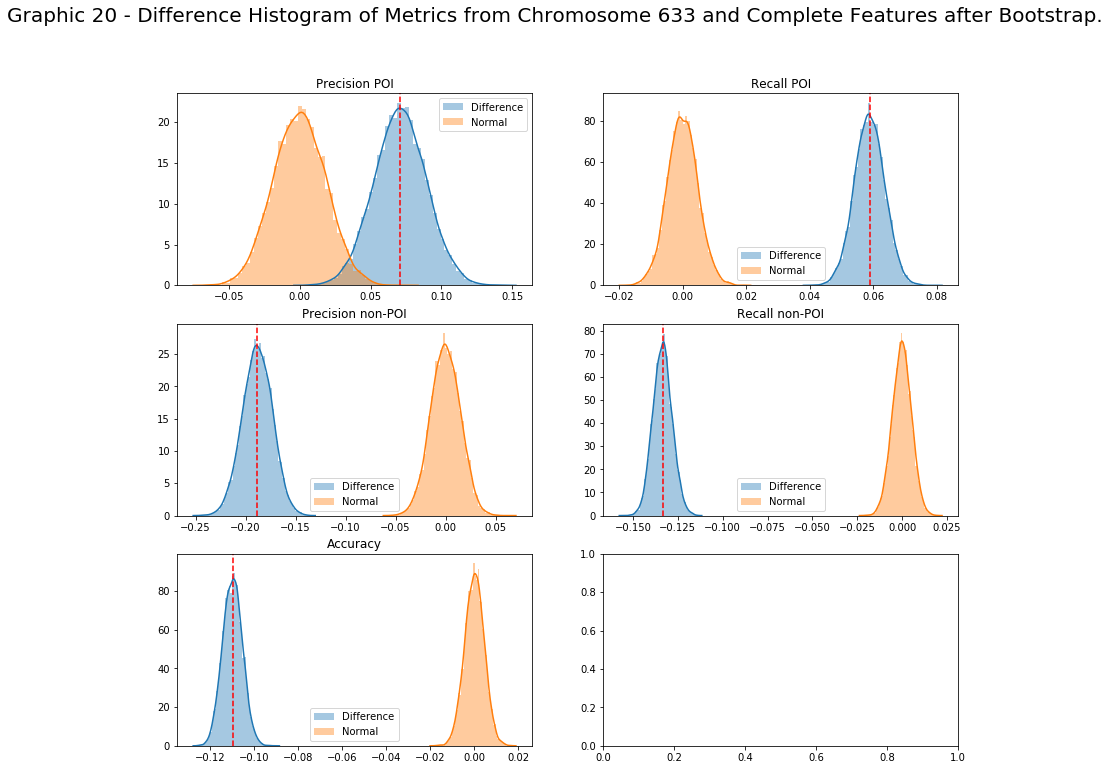

In [144]:
# Plotting comparison.
plot_diff_hist_matrix(df_1 = df_bt_633,
                      df_2 = df_bt_complete,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

Performing A/B Testing to see statistical significancy.

In [145]:
# Testing all features.
for i in df_bt_complete.columns:
    ab_testing(df_bt_633, df_bt_complete, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: recall_non_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: recall_poi
-------
Reject the H0
p-value: 0.0
alpha: 0.05


Feature: precision_non_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: precision_poi
-------
Reject the H0
p-value: 0.0
alpha: 0.05




I have found two metrics with statistical evidence that has better performance in the `chromosome_633` over the `features_significant_complete`.

* `recall_poi`, and;
* `precision_poi`.

This is a good indication to investigate the `chromosome_633` using tuned parameters.

As for the last comparison, I will compare the bootstrap output from `chromosome_14` and `chromosome_633`.

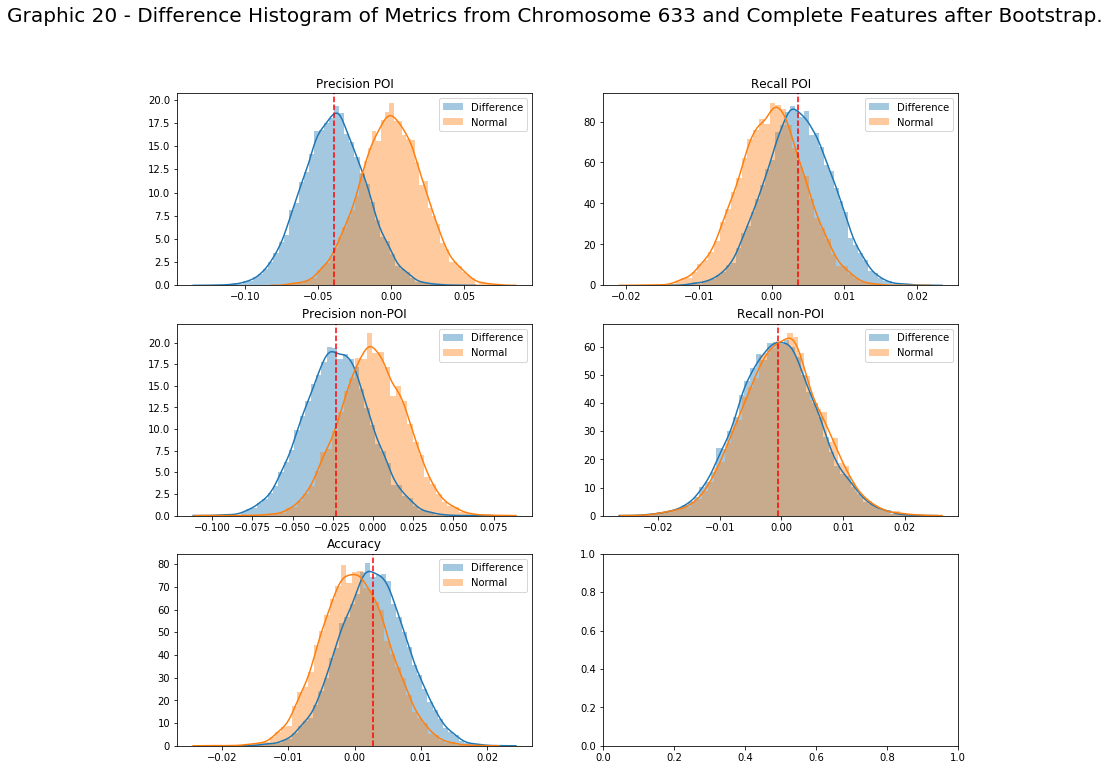

In [146]:
# Plotting comparison.
plot_diff_hist_matrix(df_bt_633, df_bt_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

Performing the A/B Testing.

In [147]:
# Running the A/B Testing for all features.
for i in df_bt_complete.columns:
    ab_testing(df_bt_633, df_bt_14, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 0.294
alpha: 0.05


Feature: recall_non_poi
-------
Fail to reject the H0
p-value: 0.5369
alpha: 0.05


Feature: recall_poi
-------
Fail to reject the H0
p-value: 0.217
alpha: 0.05


Feature: precision_non_poi
-------
Fail to reject the H0
p-value: 0.8638
alpha: 0.05


Feature: precision_poi
-------
Fail to reject the H0
p-value: 0.969
alpha: 0.05




There are no feature with statistical evidence in `chromosome_633` that has better performance over the features from `chromosome_14`.

### 3.5. Dimension Reduction <a id='pca'></a>

Due to the few features of this model (3 in `chromosome_14` and 5 in `chromosome_633`), I will not use the PCA because I do not see any advantages to reduce the number of features, the trade-off between computational performance and information-loss it is in favour to keep the features as is.

### Task 1 - Feature List <a id='task1'></a>

>**Select what features you'll use.**

In [148]:
feature_list = chromosome_633

feature_list

['poi',
 'exercised_stock_options',
 'deferred_income',
 'loan_advances',
 'ratio_to_from',
 'ratio_to_poi']

Finally, I have selected the features. The reason to select the `chromosome_633` is due to the slightly better metric of recall.

***

# 4. Predicting <a id='predicting'></a>

So far I have used the Naïve Bayes (default parameterized) to find an optimized set of features, the next step of this project is to adjust the parameters to find an even better solution.

Remember, the main objective of this project is to create a model capable to classify an employee (POI or not) based on past experiences (database).

For this step, I have used the [StratifiedShuffleSplit][sk_learn_sss] to help the model selection and due to the few number of observations.

[sk_learn_sss]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

## 4.1. Tuning Parameters <a id='tuning'></a>

In this chapter I have performed the parameters' tuning from several classifiers, due to the so many different parameters combination and the difficult to create a function to automize it, I have done it manually.

The general setup for each calibration:

* Training and Test dataset based on `chromosome_633`;
* scoring = recall;
* n_split = 20, and;
* Random State = 42.

Let's create a dedicated dataset for tuning.

In [149]:
# Creating Datasets to be used in tuning.
lab_tuning, feat_tuning = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = chromosome_633)

# Scaling.
feat_tuning = feat_scale(feat_tuning)

To avoid repetition in the report, I have created a function to bundle some code lines. The output of this function is the classifier, the reason to return a classifier is due to the flexibility provided using it. I could use all methods of GridSearchCV, for instance:

* `.best_estimator_`;
* `.cv_results_`, and etc.

In [150]:
# Function to encapsulate some code lines.
def tuning(parameters, classifier, feat = feat_tuning, lab = lab_tuning, scoring = 'recall', n_splits = 20, random_state = None):
    """
    This function ensemble the GridSearchCV and Pipeline to run several types of classifiers
    and several values of parameters.
    """
    
    # Dictionary of Classifiers and Constructors.
    list_class = {'ada':('ada', AdaBoostClassifier()),
                  'svc':('svc', SVC()),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier()),
                  'rand':('rand', RandomForestClassifier())}
    
    # Creating the Pipeline.
    pipeline = Pipeline([list_class[classifier]])

    # Creating the GridSearch Object.
    clf = GridSearchCV(estimator = pipeline,                         # Pipeline
                       param_grid = parameters,                      # Parameters to be tested.
                       cv = StratifiedShuffleSplit(n_splits = n_splits,    # Number of splits.
                                                   test_size = 0.25, # Test Dataset size
                                                   random_state = random_state), # Set the random seed.
                            scoring = scoring)                       # Metric to evaluate.
    
    StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
    # Fitting.
    clf.fit(feat, lab)
    
    # Printing recall. It is the MEAN of 20 instances/n_splits.
    print "Recall:", round(100 * clf.cv_results_['mean_test_score'].max(), 2), "%"
    
    # Creating a vector to select the best value.
    select_best = clf.cv_results_['mean_test_score'] == clf.cv_results_['mean_test_score'].max()
    
    print "Recall Standard Deviation:", round( 100 * clf.cv_results_['std_test_score'][select_best][0], 2), "%"
    
    # Return the classifier.
    return clf

Sadly, I have not found an easy way to implement a heuristic to guide me to find good values of parameters (I got traumatized coding a Genetic Algorithm, for this reason, I have performed it manually). Thus, I adopted these concepts to drive through the optimized parameters.

- Best first search;
- Divide-and-conquer.

#### Best First Search

Generally, classifiers have a lot of parameters. I have defined the following strategy:

* Start by the Scalar parameters;
    * Integer;
    * Floats;
* Categorical parameters.

I will take the most promising node for each tree level, it means, I will find the optimized value for parameter_1 and keep all the other parameters constant then I move to the next parameter and repeat the same concept.

[Source][best_first_search]

[best_first_search]: https://en.wikipedia.org/wiki/Best-first_search

#### Divide-and-conquer

As a first step, I take 2 reasonable values (using intuition or the default values from the Scikit Learn) for each level of the tree (in this case the same of a parameter) and calculate the mean, which I will use as a parameter candidate.

$$\text{paramater}_1 = [value_1, mean, value_2]$$

After calculating the evaluation metric using these three values, it is possible to determine in which of the two parts the optimized value is much closed. Suppose the `value_1` is the one with a better evaluation metric.

$$\text{paramater}_1 = [value_1, \frac{value_1 + mean}{2},mean]$$

So the cycle restarts.

Have in mind, there are other situations, and this is just a brief explanation of how I have conducted the calibration.

[Source][divide_and_conquer]

[divide_and_conquer]: https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm

#### Caveat

There are several caveats in this approach one of them is I could fall in a local maximum (mostly because I do not use backtracking).

### 4.1.1. Support Vector Machine (SVM) Tuning

Optimized parameters:

* kernel: rbf;
* C: 2000;
* degree: 3;
* gamma: 3, and;
* Recall (mean): 22.50%.

In [151]:
# Defining possible parameters.
parameters = {'svc__kernel':['linear', 'rbf'],
              'svc__C':[2000., 2100.],
              'svc__degree':[3, 2],
              'svc__gamma':[3, 4, 2]}

# Creating the classifier using the function tuning.
clf = tuning(parameters, 'svc', feat_tuning, lab_tuning, 'recall', random_state = 42)

# Printing the optimized estimator.
clf.best_estimator_

Recall: 22.5 %
Recall Standard Deviation: 19.2 %


Pipeline(memory=None,
     steps=[('svc', SVC(C=2000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Creating a classifier with optimized parameters.

In [152]:
# Creating a classifier with the optimized parameters.
clf_svm = SVC(kernel = 'rbf', C = 2000, degree = 3, gamma = 3)

### 4.1.2. Naïve Bayes Tuning

The Naïve Bayes does not have any parameter to calibrate.

* Recall (mean): 35.00%.

In [153]:
# Defining parameters.
parameters = {}

# Creating classifier and training. Bear in mind, the random state.
clf = tuning(parameters, 'gauss', feat_tuning, lab_tuning, 'recall', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 35.0 %
Recall Standard Deviation: 22.91 %


Pipeline(memory=None, steps=[('gauss', GaussianNB(priors=None))])

Creating a classifier with optimized parameters.

In [154]:
# Creating a classifier with the optimized parameters.
clf_gauss = GaussianNB()

### 4.1.3. AdaBoost Tuning

Optimized parameters:

* n_estimators: 60;
* learning_rate: 1, and;
* Recall (mean): 41.25%.

In [155]:
# Defining parameters.
parameters = {'ada__n_estimators':[70, 50, 60],
              'ada__learning_rate':[1, 0.9, 1.1]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'ada', feat_tuning, lab_tuning, 'recall', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 41.25 %
Recall Standard Deviation: 19.8 %


Pipeline(memory=None,
     steps=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=60, random_state=None))])

Creating a classifier with optimized parameters.

In [156]:
# Creating a classifier with the optimized parameters.
clf_ada = AdaBoostClassifier(learning_rate = 1.0, n_estimators = 60)

### 4.1.4. K-Nearest Neighbors Tuning

Optimized parameters:

* n_neighbors: 3;
* algorithm: auto;
* leaf_size: 1;
* p: 3, and;
* Recall(mean): 33.75%.

In [157]:
# Defining parameters.
parameters = {'knn__n_neighbors': [1, 2,3],
              'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__leaf_size':[1, 2,3],
              'knn__p':[1, 2,3]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'knn', feat_tuning, lab_tuning, 'recall', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 33.75 %
Recall Standard Deviation: 22.74 %


Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='uniform'))])

Creating a classifier with optimized parameters.

In [158]:
# Creating a classifier with the optimized parameters.
clf_knn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', leaf_size = 1, p = 3)

### 4.1.5. Decision Trees Tuning

Optimized parameters:

* class_weight: 'balanced';
* criterion: 'entropy';
* max_leaf_nodes: 3;
* min_samples_leaf: 1;
* min_samples_split: 2;
* splitter: 'best';
* max_depth: 5, and;
* Recall (mean): 75%.

In [159]:
# Defining parameters.
parameters = {'tree__class_weight':[None,'balanced'],
              'tree__criterion': ['gini', 'entropy'],
              'tree__max_depth': [5, 6 , 4],
              'tree__splitter':['best', 'random'],
              'tree__max_leaf_nodes':[None, 2, 3, 4],
              'tree__min_samples_leaf':[1, 2, 3],
              'tree__min_samples_split': [2, 3, 4]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'tree', feat_tuning, lab_tuning, 'recall', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 75.0 %
Recall Standard Deviation: 28.5 %


Pipeline(memory=None,
     steps=[('tree', DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=3,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Creating a classifier with optimized parameters.

In [160]:
# Creating a classifier with the optimized parameters.
clf_tree = tree.DecisionTreeClassifier(splitter = 'best',
                                       criterion = 'entropy',
                                       class_weight = 'balanced',
                                       min_samples_leaf = 1,
                                       min_samples_split = 2,
                                       max_depth = 5,
                                       max_leaf_nodes = 3)

### 4.1.6. Random Forest Tuning

Optimized parameters:

* class_weight: 'balanced';
* criterion: 'gini';
* max_leaf_nodes: 2;
* min_samples_leaf: 2;
* min_samples_split: 3;
* max_depth: 5, and;
* Recall (mean): 61.25%.

In [161]:
# Ensure the reproducibility.
np.random.seed(42)

# Defining parameters.
parameters = {'rand__class_weight':[None,'balanced'],
              'rand__criterion': ['gini', 'entropy'],
              'rand__n_estimators':[1, 2],
              'rand__max_depth': [5, 6 , 4],
              'rand__max_leaf_nodes':[None, 2, 3],
              'rand__min_samples_leaf':[2, 3, 4],
              'rand__min_samples_split':[2, 3]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'rand', feat_tuning, lab_tuning, 'recall')

# Printing optimized estimators.
clf.best_estimator_

Recall: 61.25 %
Recall Standard Deviation: 25.59 %


Pipeline(memory=None,
     steps=[('rand', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

Creating a classifier with optimized parameters.

In [162]:
# Creating a classifier with the optimized parameters.
clf_rand = RandomForestClassifier(n_estimators = 2,
                                  class_weight = 'balanced',
                                  criterion = 'gini', 
                                  max_depth = 5, 
                                  max_leaf_nodes = 2, 
                                  min_samples_leaf = 2, 
                                  min_samples_split = 3)

### 4.1.7. Optimized Parameters Output Comparison

Table 5 compares the Recall (mean of 20 stratified shuffle split) of Model Selection.

<strong><center>Table 5 - Recall Performance of Model Selection.</center></strong>

|Classifier|Recall \[%\]|Standard Deviation \[%\]|
|:-:|:-:|:-:|
|SVM|22.50|19.20|
|Naïve Bayes|35.00|22.91|
|AdaBoost|41.25|19.80|
|K-Nearest Neighbor|33.75|22.74|
|Decision Trees|75.00|28.50|
|Random Forest|61.25|25.59|

There are three classifiers with very poor performances:

* SVM;
* Naïve Bayes, and;
* K-Nearest Neighbors.

And two with too optimistic performances:

* Decision Trees, and;
* Random Forest.

I have evaluated all classifiers with recall greater than 30% using the `tester.py`.

## 4.2. Evaluating Classifiers after Tuning  <a id='evaluating_classifiers'></a>

Here, I have used the `test_classifier` function provided in the `tester.py` file.

Although all classifiers have been trained using the `chromosome_633`. I have evaluated two chromosomes (14 and 633) to make a simple comparison, both sets of features are quite equal, the difference stay in the two engineered features in chromosome_633.

### 4.2.1. Naïve Bayes Evaluation

In [163]:
# Testing the classifier.
tester.test_classifier(clf = clf_gauss,
                       dataset = my_dataset,
                       feature_list = chromosome_14)

GaussianNB(priors=None)
	Accuracy: 0.76985	Precision: 0.27079	Recall: 0.29300	F1: 0.28146	F2: 0.28827
	Total predictions: 13000	True positives:  586	False positives: 1578	False negatives: 1414	True negatives: 9422



In [164]:
# Testing the classifier.
tester.test_classifier(clf = clf_gauss,
                       dataset = my_dataset,
                       feature_list = chromosome_633)

GaussianNB(priors=None)
	Accuracy: 0.78757	Precision: 0.27495	Recall: 0.29750	F1: 0.28578	F2: 0.29270
	Total predictions: 14000	True positives:  595	False positives: 1569	False negatives: 1405	True negatives: 10431



##### Conclusion

Discard this classifier because it did not reach a minimum of 30% for recall and precision.

### 4.2.2. AdaBoost Evaluation

In [165]:
# Testing the classifier.
tester.test_classifier(clf = clf_ada,
                       dataset = my_dataset,
                       feature_list = chromosome_14)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=60, random_state=None)
	Accuracy: 0.82285	Precision: 0.38917	Recall: 0.26600	F1: 0.31601	F2: 0.28398
	Total predictions: 13000	True positives:  532	False positives:  835	False negatives: 1468	True negatives: 10165



In [166]:
# Testing the classifier.
tester.test_classifier(clf = clf_ada,
                       dataset = my_dataset,
                       feature_list = chromosome_633)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=60, random_state=None)
	Accuracy: 0.85721	Precision: 0.50032	Recall: 0.38900	F1: 0.43769	F2: 0.40712
	Total predictions: 14000	True positives:  778	False positives:  777	False negatives: 1222	True negatives: 11223



##### Conclusion

To the set of features of `chromosome_633`, both metrics have outperformed the threshold of 30%.

This classifier should be picked as a candidate.

### 4.2.3. K-Nearest Neighbors Evaluation

In [167]:
# Testing the classifier.
tester.test_classifier(clf = clf_knn,
                       dataset = my_dataset,
                       feature_list = chromosome_14)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='uniform')
	Accuracy: 0.82638	Precision: 0.34272	Recall: 0.14000	F1: 0.19879	F2: 0.15878
	Total predictions: 13000	True positives:  280	False positives:  537	False negatives: 1720	True negatives: 10463



In [168]:
# Testing the classifier.
tester.test_classifier(clf = clf_knn,
                       dataset = my_dataset,
                       feature_list = chromosome_633)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='uniform')
	Accuracy: 0.84064	Precision: 0.34783	Recall: 0.13200	F1: 0.19137	F2: 0.15070
	Total predictions: 14000	True positives:  264	False positives:  495	False negatives: 1736	True negatives: 11505



##### Conclusion

The result from `chromosome_14` has slightly better metrics from the `chromosome_633`, which is counter-intuitive because the classifier was trained using the `chromosome_633` dataset.

I have discarded this classifier because the recall metric did not reach 30%.

### 4.2.4. Decision Trees Evaluation

In [169]:
# Testing the classifier.
tester.test_classifier(clf = clf_tree,
                       dataset = my_dataset,
                       feature_list = chromosome_14)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=3,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.69077	Precision: 0.22524	Recall: 0.41400	F1: 0.29175	F2: 0.35457
	Total predictions: 13000	True positives:  828	False positives: 2848	False negatives: 1172	True negatives: 8152



In [170]:
# Testing the classifier.
tester.test_classifier(clf = clf_tree,
                       dataset = my_dataset,
                       feature_list = chromosome_633)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=3,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.68021	Precision: 0.26468	Recall: 0.69650	F1: 0.38359	F2: 0.52515
	Total predictions: 14000	True positives: 1393	False positives: 3870	False negatives:  607	True negatives: 8130



##### Conclusion

Although I have discarded this classifier, I have noted the recall metric is the greatest from all classifiers.

### 4.2.5. Random Forest Evaluation

In [171]:
# Testing the classifier.
tester.test_classifier(clf = clf_rand,
                       dataset = my_dataset,
                       feature_list = chromosome_14)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.71623	Precision: 0.23199	Recall: 0.36550	F1: 0.28383	F2: 0.32777
	Total predictions: 13000	True positives:  731	False positives: 2420	False negatives: 1269	True negatives: 8580



In [172]:
# Testing the classifier.
tester.test_classifier(clf = clf_rand,
                       dataset = my_dataset,
                       feature_list = chromosome_633)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.71393	Precision: 0.25375	Recall: 0.51650	F1: 0.34031	F2: 0.42789
	Total predictions: 14000	True positives: 1033	False positives: 3038	False negatives:  967	True negatives: 8962



##### Conclusion

Discard this classifier because it did not reach a minimum of 30% for recall and precision.

### Task 5 -  Tune your classifier <a id='task5'></a>

>**Tune your classifier to achieve better than .3 precision and recall using our testing script.**

The best classifier according to the chosen `list_features` is the **AdaBoost**.

```
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=60, random_state=None)
	Accuracy: 0.85721	Precision: 0.50032	Recall: 0.38900	F1: 0.43769	F2: 0.40712
	Total predictions: 14000	True positives:  778	False positives:  777	False negatives: 1222	True negatives: 11223
```

In [173]:
# Select Classifier.
clf_ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=60, random_state=None)

### Task 6 - Dump your classifier, dataset, and `features_list` <a id='task6'></a>

>**Dump your classifier, dataset, and features_list so anyone can check your results.**

In [175]:
# Task 5 - Dumping classifier, my_dataset, and the list of features.
dump_classifier_and_data(clf = clf_ada, dataset = my_dataset, feature_list = chromosome_633)

# 5. Conclusions <a id='conclusions'></a>


The aim of this project is to create a Machine Learning Classification Algorithm using a "raw" database (of Enron).

Along the report, I have tested several classifiers (Support Vector Machine, Naïve Bayes, AdaBoost, K-Nearest Neighbors, Decision Trees, and Random Forest) and I have ended-up selecting the AdaBoost, which have yielded:

* Precision: 0.50032;
* Recall: 0.38900, and;
* Accuracy: 0.85721.

Some of the engineered features has been selected and has yielded a better model.

# 6. Questions <a id='questions'></a>


>## Question 1
>Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The project is about the ENRON Dataset, but only using a small part of the Dataset tailored to this project which has 146 observations and 21 features (divided into an email and financial features). ENRON was a company of energy based in Houston, USA, this company crashed after the fraud committed by the directors became public.

The main goal of this project is the proper understanding of all process/steps of a Machine Learning model and how to apply it in a real case of prediction. I have divided this Machine Learning Project into:

##### Gathering data

Downloading the data forking/cloning it from the Github.

##### Assessing and Cleaning data

Assessing the data to identify any problems in the 146 observations overall 21 features. I have found some problems like:

* Aggregated observation such as TOTAL;
* Non-standard employee such as THE TRAVEL AGENCY IN THE PARK, and;
* NaN values.

In this step, to fix these problems I have removed the TOTAL and THE TRAVEL AGENCY IN THE PARK. In the case of NaN, I have filled it with 0.

##### Selecting features

Due to a large number of features, I have used the `SelectKBest` module to filter the features with statistical significance, later I have used a Genetic Algorithm to find which set of features has the most promising/up-and-coming metrics.

##### Selecting classifier

This step is crucial and for this reason, I have tested several kinds of classifiers/algorithms:

* Support Vector Machine;
* AdaBoost;
* K Neighbor; 
* Decision Tree;
* Naïve Bayes, and;
* Random Forest.

I have created a function to bundle all these classifiers with its parameters, for this reason, I have used a "generic" approach to analyze each classifier.

The main aspect which has driven the selection decision was the balance between recall and precision, but with a preference model with a higher level of recall. Model with high recall tends to miss less the POI, this is crucial because there are few of them. In other words, I want to avoid false negatives.

##### Tuning classifier

Calibrating the values of each parameter from the classifier. This task could be done easily using `GridSearchCV`.

##### Evaluating results

Try to evaluate the stability of the results running several tests and assessing the metrics. This is a way to evaluate the capacity of the generalization of the model.

##### Drawing conclusion.

Finally, after all, the steps above mentioned the classifiers select is the AdaBoost with the following metrics:

* Precision: 0.50032;
* Recall: 0.38900;
* Accuracy: 0.85721, and;
* Number of predictions: 14000.

These metrics met with the threshold established by the project requirements.

As a result of it, the model based on ENRON dataset will be able to predict with a good margin of confidence, if an employee from ENRON is a Person of Interest (POI) or not.

>## Question 2 
>What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]


I have used the `SelectKBest` as the first step of my selection features process. The uniqueness step I have inserted in this project is the addition of a Genetic Algorithm to evaluate several sets of features (from the output of `SelectKBest`) and for each one, I have calculated the accuracy, recall, and precision. After some generations, I have selected an optimized solution, which I have used along the project.

##### Using only Original Features

In [177]:
# Subsetting and joining the chosen set of features. 
original_nsga2_selectkbest = feat_sel_results.query('p_values < 0.05')
original_nsga2_selectkbest.index = original_nsga2_selectkbest.feature.tolist()
original_nsga2_selectkbest = original_nsga2_selectkbest.drop(columns = ['feature','hue'])
original_nsga2_selectkbest.join(original_final.loc[:,[14]])

,scores,p_values,14
exercised_stock_options,24.815080,0.000002,1
total_stock_value,24.182899,0.000002,0
bonus,20.792252,0.000011,0
salary,18.289684,0.000035,0
deferred_income,11.458477,0.000922,1
long_term_incentive,9.922186,0.001994,0
restricted_stock,9.212811,0.002863,0
total_payments,8.772778,0.003589,0
shared_receipt_with_poi,8.589421,0.003946,0
loan_advances,7.184056,0.008232,1


As you can see, the features selected using the genetic algorithm is quite different If I had chosen, for instance, the first 5 better-ranked features from `SelectKBest`.

##### Engineered Features

I have created new features combining two features in one, such as:

* ratio_to_from: the proportion of email sent by email received, I have tried to create a feature with a better SelectKBest score because most of the email features have lower scores;
* ratio_to_poi: email sent proportion to POI, this could show a pattern/behaviour between POI;
* ratio_from_poi: email received proportion from POI, this could show a pattern/behaviour between POI;
* ratio_from_poi_share: POI could share an email with several POI, which could be a sign of fraud;
* from_poi_to_this_person: email received from a POI person;
* ratio_salary_total_payments: I want to investigate if the ratio of salary and total payments could put some evidence in the POI.

I have made the same procedure of the " Original Features". I have run the Genetic Algorithm but this time with the new features.

In [178]:
# Subsetting and joining data to create a comparison.
complete_nsga2_selectkbest = feat_sel_results_complete.query('p_values < 0.05')
complete_nsga2_selectkbest.index = complete_nsga2_selectkbest.feature.tolist()
complete_nsga2_selectkbest = complete_nsga2_selectkbest.drop(columns = ['feature','hue'])
complete_nsga2_selectkbest.join(complete_final.loc[:,[633]])

,scores,p_values,633
exercised_stock_options,24.815080,0.000002,1
total_stock_value,24.182899,0.000002,0
bonus,20.792252,0.000011,0
salary,18.289684,0.000035,0
deferred_income,11.458477,0.000922,1
long_term_incentive,9.922186,0.001994,0
restricted_stock,9.212811,0.002863,0
total_payments,8.772778,0.003589,0
shared_receipt_with_poi,8.589421,0.003946,0
loan_advances,7.184056,0.008232,1


Similarly when I was using only "original features", the set of features I have selected after the Genetic Algorithm is almost the same of the previous, with the exception of two new features `ratio_to_from` and `ratio_to_poi`.

##### Feature List

I have ended up choosing the set of features with the engineered features, but along the project, I have used both sets of features to make a comparison of performance.

In [179]:
# Chromosome 633
feature_list

['poi',
 'exercised_stock_options',
 'deferred_income',
 'loan_advances',
 'ratio_to_from',
 'ratio_to_poi']

##### Scale

Due to the existence of features with different scales (millions of USD, thousands of USD, a few numbers of emails, etc.) I have identified the necessity of scale the features to avoid any feature dominant over the other. I have also noticed the necessity to scale the features to run the SVM classifier because if not the algorithm take too long to run the experiment.

>## Question 3 
>What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

Although I have chosen the AdaBoost as my final algorithm, I have tested other 5 classifiers. The reason to test many classifiers is the curiosity to see its performance and eager to learn. Table 6 show the outcome of each classifier after run the `.test_classifier()`.

<strong><center>Table 6 - Classifiers Metrics after `.test_classifier()`.</center></strong>

|Classifier   |Accuracy|Precision|Recall |
|:-:          |:-:     |:-:      |:-:    |
|AdaBoost     |0.85721 |0.50032  |0.38900|
|Naïve Bayes  |0.78757|0.27495|0.29750|
|KNN|0.84064|0.34783|0.13200|
|Decision Trees|0.68021|0.26468|0.69650|
|Random Forest|0.71393|0.25375|0.51650|

Decision Trees and Random Forest became closer to reach the threshold.

Have in mind, I did not run the `test_classifier` in the SVM classifier because it did not reach the threshold of 0.3 in recall and precision.

>## Question 4 
>What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]


The tuning process is a fine adjustment of each classifiers' parameters, this process could be very painful due to the no number of simulations necessary to adjust everything. Luckily, the Scikit Learn has the module `GridSearchCV`, which automatize several steps of the tuning process, given a list of parameters to evaluate this method make a combination of all parameters and run repeatedly the model. The output of the function is a dictionary with all results combinations.

The Naïve Bayes is the simplest one because it does not have parameters, on the other hand, Decision Trees and Random Forest has a lot of parameters.

* Support Vector Machine: kernel, C, Degree, and Gamma;
* AdaBoost: n_estimators and learning_rate;
* K-Nearest Neighbors: n_neighbors, alogirthm, leaf_size, and p;
* Decision Trees: class_weight, criterion, max_depth, splitter, max_leaf_nodes, min_samples_leaf, and min_samples_split;
* Random Forest: class_weight, criterion, max_depth, splitter, max_leaf_nodes, min_samples_leaf, and min_samples_split;

For all simulations using `GridSearchCV`, I have used the `StratifiedShuffleSplit` as a cross-validation module.

>## Question 5
>What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]


The classic mistake in cross-validation is the _overfitting_ and the symptoms is an outstanding performance using the training data and a huge difficult to generalize using an independent dataset or testing data.

I have tested (while coding) some methods to split the dataset:

* Train Test Split;
* KFolds;
* StratifiedKFolds, and;
* StratifiedShuffleSplit.

And I have ended up using the `StratifiedShuffleSplit` and `StratifiedKFolds`:

* `StratifiedShuffleSplit`: I have used it in model selection because it is very good when the dataset has few observations (this is the ENRON case). The `GridSearchCV` has used the `StratifiedShuffleSplit` with 20 `n_splits`, I took the recall average to filter, which classifier I should discard or select;
* `StratifiedKFolds`: I have used it to create a sample using the Monte Carlo process, later I have bootstrapped it to create a histogram. I have used this approach to compare two different set of features using the same classifier with the same parameters.

Bear in mind, both are `stratified`, which means it preserves the ratio/proportion of each label during the process of "folding" or "splitting". The ENRON Dataset is very unbalanced, so it is necessary to keep the ratio when the model is training or evaluating.

>## Question 6
>Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

Along the project, I have tracked the performance of accuracy, recall, and precision. These metrics are all about the model is committing an error (or not), like classifying something like 0 when in a reality it is 1, or vice-versa.

* **Precision:** When the classification of a positive observation is correctly classified as positive. Have in mind, sometimes I can mark an observation as positive but it is not, this kind of error is the so-called false positive. This metric try to measure how well the model is marking/flagging the positive class;

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$


* **Recall:** When an observation is not marked as positive when it should be marked as positive. It means I have miss-classified a positive value marking it as negative. It is also known as false negative. This metric try to measure how well the model is marking/flagging the real positives observations;

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

* **Accuracy:** The proportion of correct classification overall number of os observations.

Recall the table 6.

<strong><center>Table 6 - Classifiers Metrics after `.test_classifier()`.</center></strong>

|Classifier   |Accuracy|Precision|Recall |
|:-:          |:-:     |:-:      |:-:    |
|AdaBoost     |0.85721 |0.50032  |0.38900|
|Naïve Bayes  |0.78757|0.27495|0.29750|
|KNN|0.84064|0.34783|0.13200|
|Decision Trees|0.68021|0.26468|0.69650|
|Random Forest|0.71393|0.25375|0.51650|



The Decision Trees classifier has the greater value of Recall, which I could interpret as the model can identify almost 70% of all real positives observations, however, only 26.4% of all observation marked as positives are real positives.

In contrast, the AdaBoost classifier has 38.9% in the recall metric, but the precision is almost 50%, which means that all observations marked as positive is real positive in 50% of the cases.

Generally, exist a kind of trade-off between recall and precision, and I must chose which one I more critical to my model.

For my understanding, the recall metric is the most important because I want to find POI and I do not want to miss anyone that is truly POI.

***

# References <a id='references'></a>



* Feature Selection using LASSO [PDF][ref_01];
* Feature selection for “final” model when performing cross-validation in machine learning, Cross Validation thread, [website][ref_02];
* Perform feature normalization before or within model validation?, Cross Validation thread, [website][ref_03];
* Right order of doing feature selection, PCA and normalization?, Stack Overflow thread, [website][ref_04];
* How does SelectKBest work?, Stack Exchange thread, [website][ref_05];
* What's the meaning of p-values which produced by feature selection (i.e. chi2 method)?, Stack Overflow thread, [website][ref_06];
* Batista, D. S., Hyperparameter optimization across multiple models in scikit-learn, Blog, [website][ref_07];
* Faces recognition example using eigenfaces and SVMs, Scikit Learn Documentation, Example, [website][ref_08]; 
* Precision and Recall, Scikit Learn Documentation, [website][ref_09];
* Add new keys to a dictionary?, Stack Overflow thread, [website][ref_10];
* A fast and elitist multiobjective genetic algorithm: NSGA-II, IEEE Xplorer, [website][ref_11];
* Multi-Objective Optimization using Evolutionary Algorithms, Kalyanmoy Deb, Wiley;
* Use sklearn's GridSearchCV with a pipeline, preprocessing just once, Stack Overflow thread, [website][ref_12];
* Putting it all together, Scikit Learn Example, [website][ref_13];
* Choosing the Right Metric for Evaluating Machine Learning Models — Part 2, Swalin, A. , Medium Blog, [website][ref_14];
* Why use stratified cross validation? Why does this not damage variance related benefit?, Cross Validation thread, [website][ref_15]




[ref_01]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf
[ref_02]: https://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine
[ref_03]: https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation
[ref_04]: https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization
[ref_05]: https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
[ref_06]: https://stackoverflow.com/questions/23677734/whats-the-meaning-of-p-values-which-produced-by-feature-selection-i-e-chi2-me
[ref_07]: http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
[ref_08]: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
[ref_09]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
[ref_10]: https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
[ref_11]: https://ieeexplore.ieee.org/document/996017
[ref_12]: https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once/43366811
[ref_13]: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
[ref_14]: https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428
[ref_15]:https://stats.stackexchange.com/questions/117643/why-use-stratified-cross-validation-why-does-this-not-damage-variance-related-b





##### Scikit Learn

* F1 Score, [Website][scikit_learn_f1_score];
* Selected k Best, [Website][scikit_learn_selectedkbest];
* Feature Selection Module, [Website][scikit_learn_feat_select]
* f_classif from Feature Selection module, [Website][scikit_learn_f_classif];
* Lasso, [Website][scikit_learn_lasso];
* MinMaxScaler, [Website][scikit_learn_minmaxscaler]
* Recall Score from Metrics, [Website][scikit_learn_recall] 
* Precision Score from Metrics, [Website][scikit_learn_precision] 



[scikit_learn_f1_score]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
[scikit_learn_selectedkbest]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
[scikit_learn_f_classif]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
[scikit_learn_lasso]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
[scikit_learn_feat_select]: https://scikit-learn.org/stable/modules/feature_selection.html
[scikit_learn_minmaxscaler]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
[scikit_learn_recall]:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
[scikit_learn_precision]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html


***

# Appendix <a id='appendix'></a>

## A.1. Given Code <a id='code'></a>

### A.1.1. `poi_id.py`

```py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)
```

### A.1.2. `tester.py`


```py
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    
    
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()
```